# Initial EDA of MIMIC-IV Dataset

This notebook aims to be a comprehensive exploratory data analysis (EDA) of the MIMIC-IV dataset, primarily the ED and HOSP modules from the database. 

It will aim to understand the underlying distributions and shape of the data, explore and understand the missingness, identify potential outliers, feature engineer new variables, and attempt merging tables. THe main purpose is to gain a deeper understanding and understand how to preprocess the data for further analysis.

**For graders** -> <b>this notebook is not meant to be run, but rather to understand how we derived our steps for the preprocessing class</b>

# MIMIC Background Information

- MIMIC (Medical Information Mart for Intensive Care) is a large, freely-available database comprising deidentified health-related data from patients who were admitted to the critical care units of the Beth Israel Deaconess Medical Center.
- MIMIC-IV contains data from 2008-2019. The data was collected from Metavision bedside monitors.

Main Modules:

- `HOSP` (Hospital): The Hosp module provides all data acquired from the hospital wide electronic health record. Information covered includes patient and admission information, laboratory measurements, microbiology, medication administration, and billed diagnoses.

- `ICU` (Intensive Care Unit) Module: The ICU module contains information collected from the clinical information system used within the ICU. Documented data includes intravenous administrations, ventilator settings, and other charted items.

- `ED` (Emergency Department) Module: The ED module contains data for emergency department patients collected while they are in the ED. Information includes reason for admission, triage assessment, vital signs, and medicine reconciliaton. The subject_id and hadm_id identifiers allow MIMIC-IV-ED to be linked to other MIMIC-IV modules.


The goal of this notebook is to perform exploratory data anlysis (EDA) on MIMIC-IV dataset, primarily on the HOSP, ED, and ICU modules. The EDA notebook will provide insights into the structure of the dataset, the distribution of variables, and the relationships between variables. This will help us further in creating preprocessing scripts to clean and prepare the data for further analysis.

# Table of Contents

- [Importing the Data](#Importing-the-Data)
- [Exploring Individual Tables](#Exploring-Individual-Tables)
  - [ED Stays Table](#Exploring-Ed-Stays-Table)
  - [Admissions Table](#Exploring-Admissions-Table)
  - [Transfers Table](#Exploring-Transfers-Table)
  - [Triage Table](#Exploring-Triage)
  - [Diagnosis Table](#Exploring-Diagnosis-Table)
- [Merging Tables](#Merging-Tables)
  - [Admission and Ed Stays](#Merging-Admissions-and-Ed-Stays)
- [Model Interpretation](#Model-Interpretation)

# Importing the Data

As this is a de-identified but still sensitve data, each team member will download from the source (physio.net) on their own

In [1]:
%load_ext autoreload
%autoreload 2

#### Imports

In [2]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to visualize missingness
import missingno as msno 
# utility functions
from preprocessing.utils import Utils
from config import FILE_PATHS

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

In [3]:
# Load the dataframes using the file_paths dictionary
ed_stays = pd.read_csv(FILE_PATHS['edstays'])
admissions = pd.read_csv(FILE_PATHS['admissions'])
transfers = pd.read_csv(FILE_PATHS['transfers'])
diagnosis = pd.read_csv(FILE_PATHS['diagnosis'])
triage = pd.read_csv(FILE_PATHS['triage'])
vitalsigns = pd.read_csv(FILE_PATHS['vitalsigns'])


In [4]:
# load the maps for specific features

# we could map 
# Mapping dictionary
race_mapping = Utils.race_mapping

# Exploring Individual Tables

To get a sense of feel for the features, their object types, the distributions of numerical and cateogorical features/variables

## Exploring Ed Stays Table

In [5]:
Utils.print_info(ed_stays)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 425087, Columns: 9

Column Types:
  object: 6
  int64: 2
  float64: 1

Missing Values:
  hadm_id: 222071 (52.24%)

Numeric Columns Summary:
         subject_id       hadm_id       stay_id
count  4.250870e+05  2.030160e+05  4.250870e+05
mean   1.500871e+07  2.499495e+07  3.499735e+07
std    2.878486e+06  2.888745e+06  2.888342e+06
min    1.000003e+07  2.000002e+07  3.000001e+07
25%    1.251789e+07  2.248982e+07  3.249799e+07
50%    1.501628e+07  2.499935e+07  3.499395e+07
75%    1.749900e+07  2.749388e+07  3.750387e+07
max    1.999999e+07  2.999981e+07  3.999996e+07

Categorical Columns Summary:
  intime:
    Unique values: 422817
    Top 5 values: {'2173-05-28 00:17:00': 4, '2152-07-14 23:30:00': 4, '2149-12-09 13:16:00': 3, '2178-03-20 11:56:00': 3, '2132-10-05 21:42:00': 3}
  outtime:
    Unique values: 423227
    Top 5 values: {'2173-05-28 06:08:00': 5, '2127-11-21 06:12:00': 3, '2183-06-01 20:11:00': 3, '2157-06-17 23:17

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [6]:
# convert the time columns into datetime objects for analysis
Utils.convert_to_datetime(ed_stays, ['intime', 'outtime'])

# compute the length of stay for ed (in hours)
Utils.compute_length_of_stay(ed_stays, 'intime', 'outtime', 'ed')

# attempting to group race into broader categories
Utils.map_to_group(ed_stays, 'race', race_mapping, fill_na = 'Other')

In [7]:
ed_stays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,ed_los_hours,race_grouped
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,4.216667,White/European Descent
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,5.616667,White/European Descent
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,4.766667,White/European Descent
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,13.500000,White/European Descent
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,8.100000,White/European Descent


### Race-Based Analysis of Length of Stay
Question: Are there racial disparities in the length of ED stay?

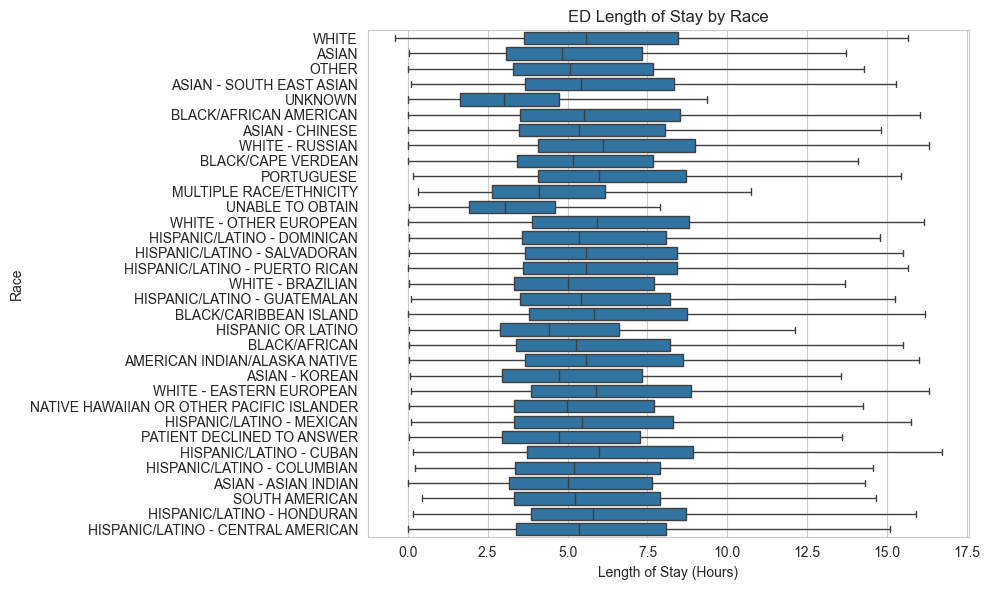

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ed_stays, x='ed_los_hours', y='race', orient='h', showfliers=False)
plt.title('ED Length of Stay by Race')
plt.xlabel('Length of Stay (Hours)')
plt.ylabel('Race')
plt.tight_layout()
plt.savefig("../visualizations/ED-Stay-By-Race.png")
plt.show()

We can see theres a lot of variety, lets see the visualization after the grouping

<Figure size 1000x600 with 0 Axes>

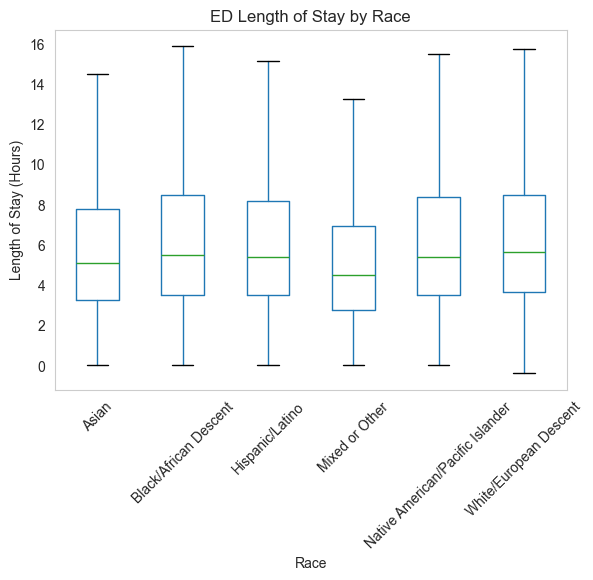

In [9]:
plt.figure(figsize=(10,6))
ed_stays.boxplot(column='ed_los_hours', by='race_grouped', grid=False, showfliers=False)
plt.title('ED Length of Stay by Race')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Race')
plt.ylabel('Length of Stay (Hours)')
plt.xticks(rotation=45)
plt.savefig("../visualizations/ED-Stay-By-Race.png")
plt.show()

Here we can see 'Mixed or Other' categroy has lower median and IQR ranges compared to the other groups

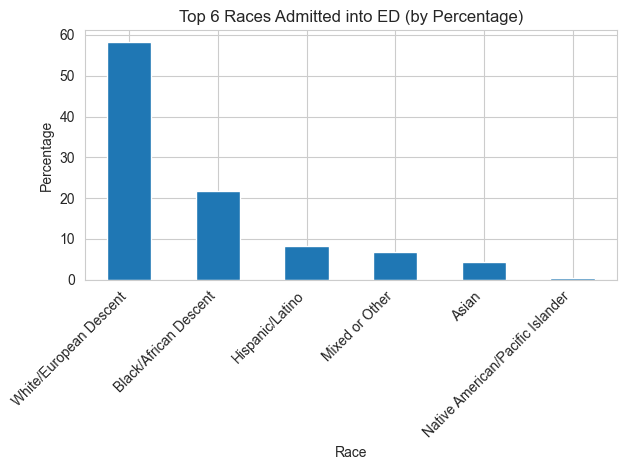

In [10]:
# Calculate percentage of each race group
race_percentages = ed_stays['race_grouped'].value_counts(normalize=True) * 100

# Plot top 6 race groups by percentage
race_percentages[:6].plot.bar()
plt.title("Top 6 Races Admitted into ED (by Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Race")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../visualizations/ED-Stay-By-Race-Percentage.png")
plt.show()

Here we can see there it is a huge disparity between the most frequent group (White) compared to the rest of the groups. It appears Native American/Pacific Islander is very rare.

### Distribution of Length of Stay

Question: What is the distribution of the length of stay (time) in the ED?

In [11]:
ed_los_max = ed_stays['ed_los_hours'].max()
ed_los_min = ed_stays['ed_los_hours'].min()

print(f'The range of length of stay duration (hours) is:\n(min: {ed_los_min}, max: {ed_los_max})\nRange: {(ed_los_max - ed_los_min)}')

The range of length of stay duration (hours) is:
(min: -22.733333333333334, max: 493.06944444444446)
Range: 515.8027777777778


It is uncertain if the maximum value is a valid measurement, however it would be roughly 4 years in the ED which seems unlikely. Taking into account that there is a min of negative which appears impossible (can't have negative duration for length of stay), looking into the MIMIC documentation, lenghts of stays that are negative indicate organ donors

We should clean up and remove extreme outliers and set a lower bound 0

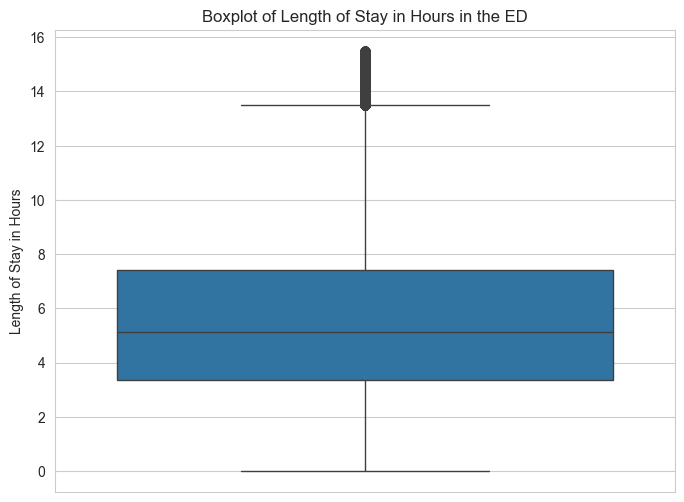

In [12]:
ed_stays = Utils.filter_outliers(ed_stays, 'ed_los_hours')

# drop rows with less than 0
ed_stays = ed_stays[ed_stays['ed_los_hours'] >= 0]

# create the boxplot
plt.figure(figsize=(8, 6))
g = sns.boxplot(y='ed_los_hours', data = ed_stays)
g.set_title('Boxplot of Length of Stay in Hours in the ED')
g.set_ylabel("Length of Stay in Hours")
plt.savefig("../visualizations/Boxplot-length-of-stay.png")
plt.show()

Note: The median of the legnth of stay is about 5 hours

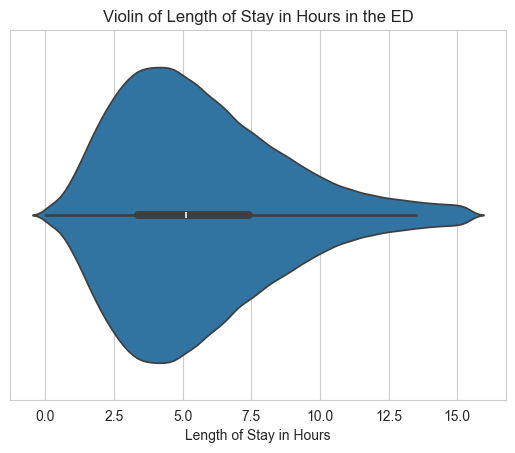

In [13]:
# a violin plot to allow to see the shape of the distribution in terms of frequency
g = sns.violinplot(x = ed_stays['ed_los_hours'], fill=True)
g.set_title('Violin of Length of Stay in Hours in the ED')
g.set_xlabel("Length of Stay in Hours")
plt.savefig("../visualizations/violin-length-of-stay.png")
plt.show()

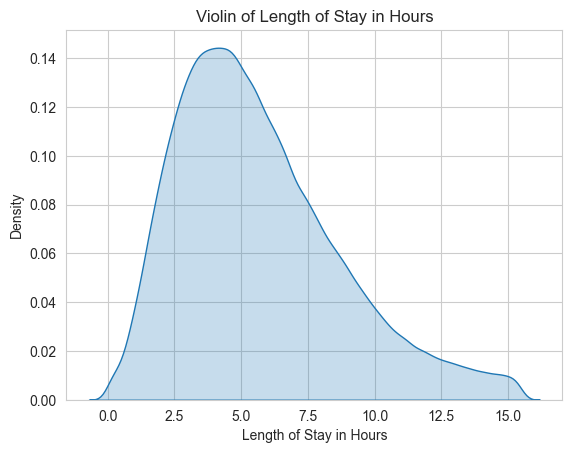

In [14]:
g = sns.kdeplot(x = ed_stays['ed_los_hours'], fill=True)
g.set_title('Violin of Length of Stay in Hours')
g.set_xlabel("Length of Stay in Hours")
plt.savefig("../visualizations/violin-length-of-stay.png")
plt.show()

We see that the distribution appears to be a right skewed normal distribution. This makes sense, as most patients in for about 2.5 to 7.5 hours. Afterwards there might be cases where long observation is needed and the patient needs to stay longer. 

You can see the effect, we create two peaks which could be interpreted as two types of patients, one that stay in the range of 2.5 to 7.5 hours compared to another group of patients that stay for over 12 hours. This could possbily be due to more severe/urgent conditions 

### Patient Flow by Time of Day

Question: When are most patients arriving and leaving the ED?

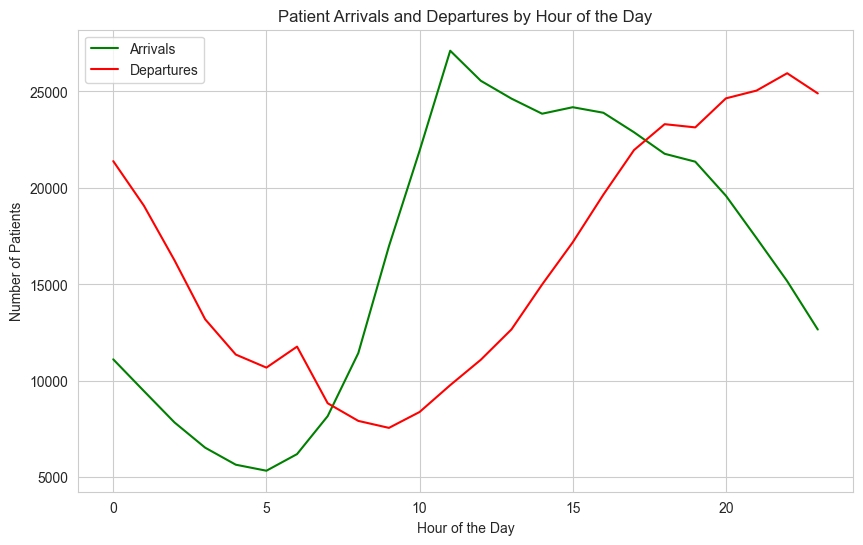

In [15]:
# extract the hour of arrival and departure
ed_stays['arrival_hour'] = ed_stays['intime'].dt.hour
ed_stays['departure_hour'] = ed_stays['outtime'].dt.hour

# now plot number of arrivals and departures by hour
plt.figure(figsize=(10,6))
ed_stays['arrival_hour'].value_counts().sort_index().plot(kind='line', label='Arrivals', color='green')
ed_stays['departure_hour'].value_counts().sort_index().plot(kind='line', label='Departures', color='red')
plt.title('Patient Arrivals and Departures by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Patients')
plt.legend()
plt.savefig('../visualizations/Arrivals-Departures-by-hour.png')
plt.show()

We can see the number of arrivals peaks around 10-12, which makes sense as it is the peak of the day with the most activity. We can see that the departures lags behind the arrivals which also is a sanity check

### Patient Disposition Analysis
Question: How are patients leaving the ED (e.g., admitted, discharged, transferred)?

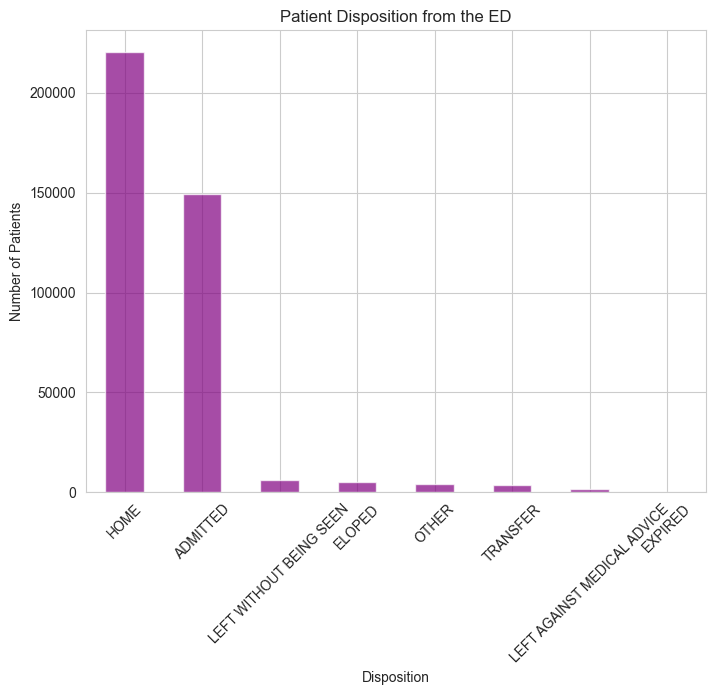

In [16]:
plt.figure(figsize=(8,6))
ed_stays['disposition'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Patient Disposition from the ED')
plt.xlabel('Disposition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.savefig("../visualizations/Patient-Disposition.png")
plt.show()

The majority go back home after the stay, the the next biggest group are admitted into the hospital.

The rest are transfered or leave

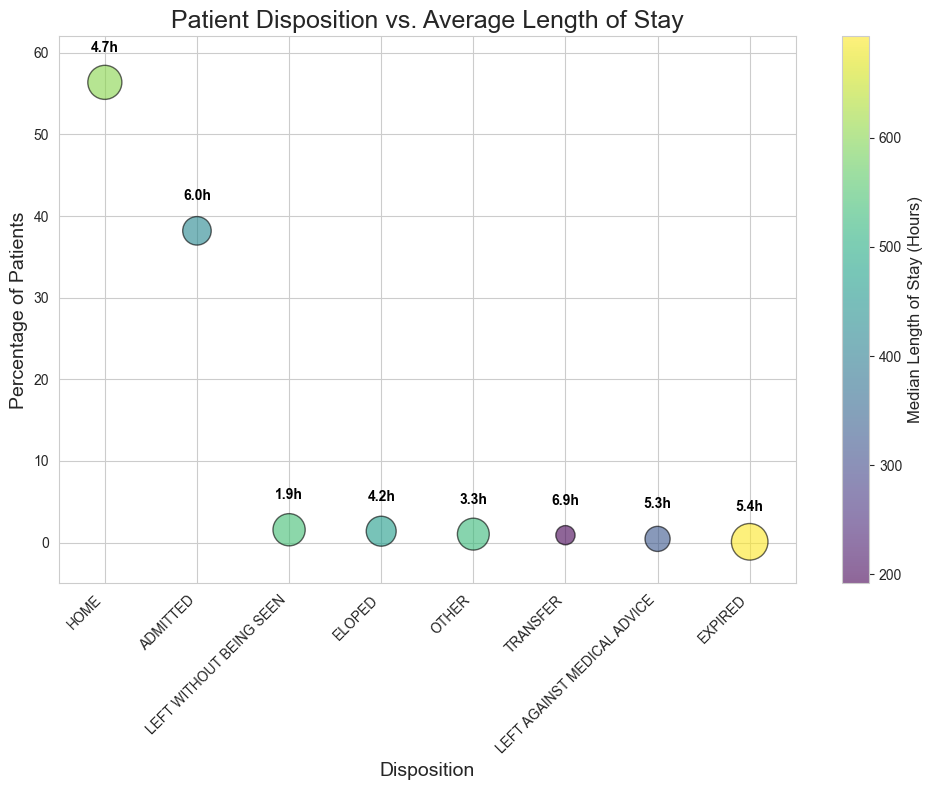

In [17]:
# Calculate median length of stay per disposition
disposition_los = ed_stays.groupby('disposition')['ed_los_hours'].median()

# Get the count of each disposition
disposition_counts = ed_stays['disposition'].value_counts(normalize=True) * 100 # convert to percentage

# Prepare bubble sizes (scale for better visibility)
bubble_sizes = disposition_los * 100  # Adjust scaling factor as needed

# Create a color palette
palette = sns.color_palette('viridis', len(disposition_counts))

plt.figure(figsize=(10, 8))

# Create the scatter plot
scatter = plt.scatter(
    disposition_counts.index,
    disposition_counts.values,
    s=bubble_sizes,
    alpha=0.6,
    c=bubble_sizes,
    cmap='viridis',
    edgecolor='black',
    linewidth=1
)

# Add a color bar to represent median length of stay
cbar = plt.colorbar(scatter)
cbar.set_label('Median Length of Stay (Hours)', fontsize=12)

# Set plot title and labels with increased font size
plt.title('Patient Disposition vs. Average Length of Stay', fontsize=18)
plt.xlabel('Disposition', fontsize=14)
plt.ylabel('Percentage of Patients', fontsize=14)

# change the x and y limits
plt.xlim(-0.5, len(disposition_counts) - 0.5)
plt.ylim(-5, max(disposition_counts) * 1.1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations for each bubble
for disp in disposition_counts.index:
    plt.text(
        disp,
        disposition_counts[disp] + (max(disposition_counts) * 0.06),  # Adjust vertical position
        f"{disposition_los[disp]:.1f}h",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        weight='bold'
    )

# Improve layout and save the figure
plt.tight_layout()
plt.savefig("../visualizations/Patient-Disposition-vs-Median-Length-of-Stay.png", dpi=300)
plt.show()

### Patient Arrival Transport:
Q: Does Length of Stay depend on the mode of arrival transportation?

<Figure size 1000x600 with 0 Axes>

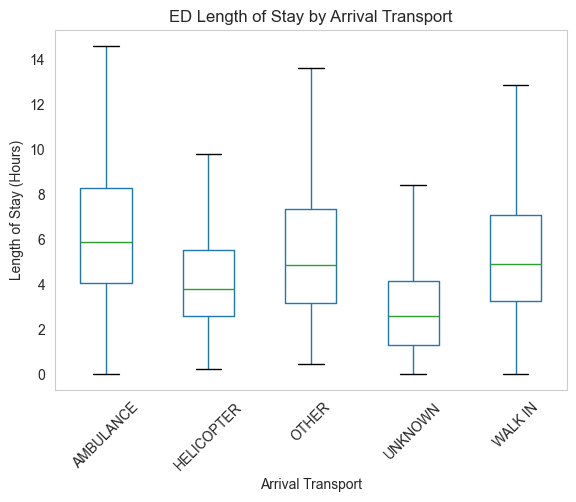

In [18]:
plt.figure(figsize=(10,6))
ed_stays.boxplot(column='ed_los_hours', by='arrival_transport', grid=False, showfliers=False)
plt.title('ED Length of Stay by Arrival Transport')
plt.suptitle('') 
plt.xlabel('Arrival Transport')
plt.ylabel('Length of Stay (Hours)')
plt.xticks(rotation=45)
plt.show()

We can see that Helicopter and Unkown show the shortest lengths of stays

-> This could be because most severe and urgent cases are taken in by helicopter, thus the patients arriving throuhg helicopter receive the most urgent care

It appears to be an informative feature for length of stay

### Gender Difference in Length of Stay

Question: Is there a differnece in the length of stay between genders?

<Figure size 800x600 with 0 Axes>

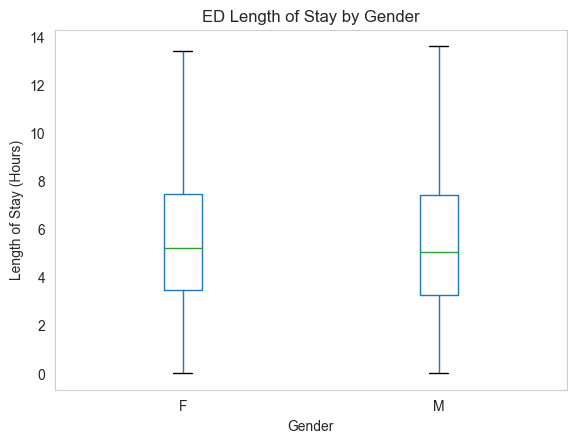

In [19]:
plt.figure(figsize=(8,6))
ed_stays.boxplot(column='ed_los_hours', by='gender', grid=False, showfliers=False)
plt.title('ED Length of Stay by Gender')
plt.suptitle('')  # remove automatic title
plt.xlabel('Gender')
plt.ylabel('Length of Stay (Hours)')
plt.show()

There appears to be no differences in the length of stsay by gender. 

### Seasonal or Monthly Trends
Question: Are there any seasonal trends in ED stays (e.g., more patients in the winter or in the summer)?

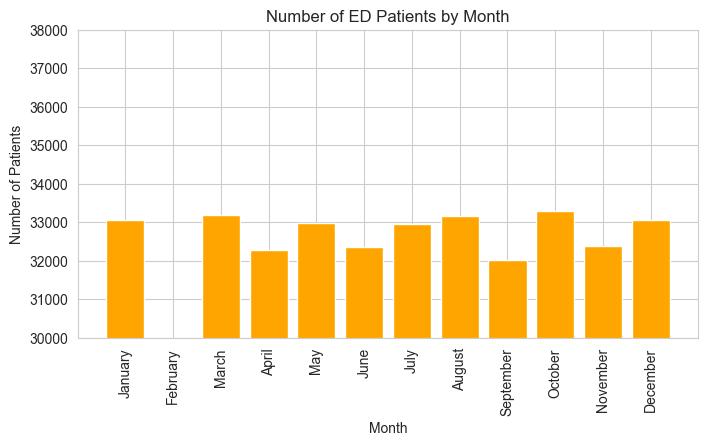

In [20]:
ed_stays['month'] = ed_stays['intime'].dt.month

# we can create a mapping 
months_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

plt.figure(figsize=(8,4))

stays_by_month = ed_stays['month'].value_counts().sort_index()

plt.bar(months_mapping.values(), stays_by_month, color='orange')
plt.title('Number of ED Patients by Month')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.ylim(30000, 38000)
plt.show()

It's hard to see the differences in the absolute counts per month. 

Trying cuberoot and log doesn't help much. 

We can use percent change to see the relative change over the year

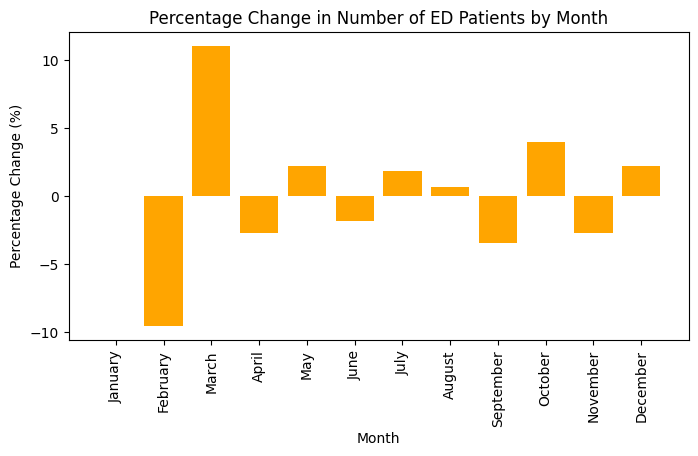

In [21]:
sns.reset_defaults()

plt.figure(figsize=(8, 4))
# compute the percetnage change by month
percentage_change = stays_by_month.pct_change().fillna(0) * 100

# plot the percentages chagne
plt.bar(months_mapping.values(), percentage_change, color='orange')
plt.title("Percentage Change in Number of ED Patients by Month")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Percentage Change (%)")
plt.show()

We see an interesting pattern of fluctuating number of patients each month. It appears there is a cycle of percentage change up and down every two months.

We could also 

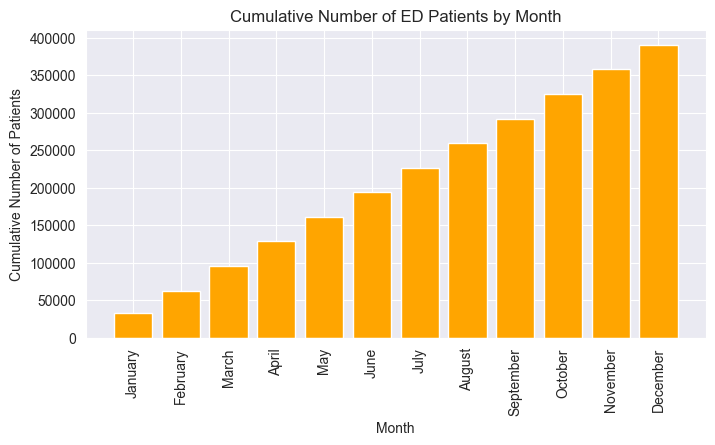

In [22]:
sns.set_style("darkgrid")

plt.figure(figsize=(8,4))
# calculate cumulative sum
cumulative_stays_by_month = stays_by_month.cumsum()

# plot the cumulative sum over time
plt.bar(months_mapping.values(), cumulative_stays_by_month, color='orange')
plt.title('Cumulative Number of ED Patients by Month')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Patients')
plt.show()

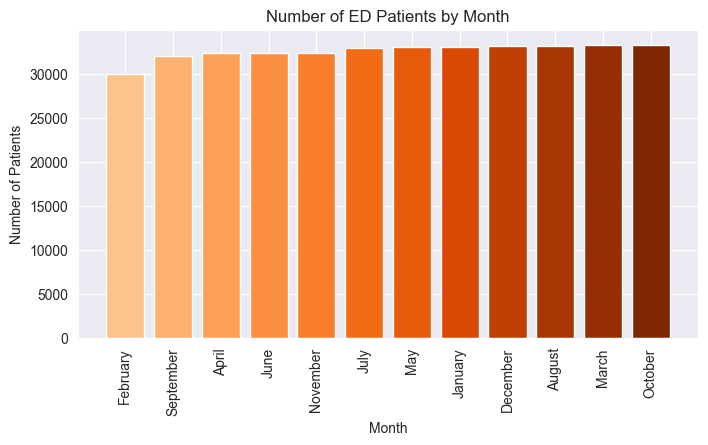

In [23]:
plt.figure(figsize=(8,4))

# Sort by number of patients
sorted_stays_by_month = stays_by_month.sort_values()

# Plot with color gradient (e.g., darker colors for higher values)
plt.bar(sorted_stays_by_month.index.map(months_mapping), sorted_stays_by_month, color=plt.cm.Oranges(np.linspace(0.3, 1, len(stays_by_month))))
plt.title('Number of ED Patients by Month')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.show()

## Exploring Admissions Table

In [24]:
Utils.print_info(admissions)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 546028, Columns: 16

Column Types:
  object: 13
  int64: 3

Missing Values:
  deathtime: 534238 (97.84%)
  admit_provider_id: 4 (0.00%)
  admission_location: 1 (0.00%)
  discharge_location: 149818 (27.44%)
  insurance: 9355 (1.71%)
  language: 775 (0.14%)
  marital_status: 13619 (2.49%)
  edregtime: 166788 (30.55%)
  edouttime: 166788 (30.55%)

Numeric Columns Summary:
         subject_id       hadm_id  hospital_expire_flag
count  5.460280e+05  5.460280e+05         546028.000000
mean   1.501118e+07  2.500100e+07              0.021612
std    2.877694e+06  2.888710e+06              0.145415
min    1.000003e+07  2.000002e+07              0.000000
25%    1.252380e+07  2.249662e+07              0.000000
50%    1.501961e+07  2.500385e+07              0.000000
75%    1.750403e+07  2.750282e+07              0.000000
max    1.999999e+07  2.999994e+07              1.000000

Categorical Columns Summary:
  admittime:
    Unique values: 

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [25]:
# preprocess steps of admissions

# convert to datetimes
Utils.convert_to_datetime(admissions, ['admittime', 'dischtime', 'edregtime', 'edouttime'])

# compute length of stay
Utils.compute_length_of_stay(admissions, 'admittime', 'dischtime', 'admission')

# apply maps
Utils.map_to_group(admissions, 'race', race_mapping, fill_na='Other')

In [26]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag,admission_los_hours,race_grouped
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0,18.866667,White/European Descent
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0,24.366667,White/European Descent
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0,42.100000,White/European Descent
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0,53.333333,White/European Descent
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0,7.166667,White/European Descent


The columns of interest are:

- `admittime` and `dischtime` -> we can compute the length of stay in the hospital and possibly compare this distribution to the one of the ED stays

- For `admission_location`, `insurance`, `marital_status` and `race_grouped` we can compute aggregate statistics on length of stay

- We have `deathtime`, we could separate the patients who died compared to those who didn't 

### Analysis of Distribution for Length of Stay duration

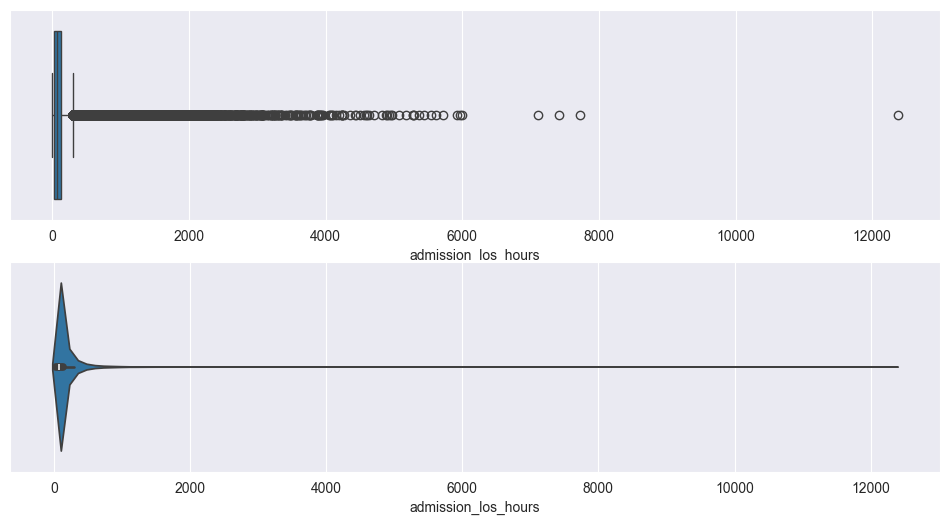

In [27]:
# cap outliers to bounds
Utils.filter_outliers(admissions, 'admission_los_hours')

# disallow negative values
admissions = admissions[admissions['admission_los_hours'] > 0]

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.boxplot(x = 'admission_los_hours', data = admissions, ax = axes[0])
sns.violinplot(x = 'admission_los_hours', data = admissions, ax = axes[1])
plt.savefig("../visualizations/admission-length-of-stay.png")
plt.show()

It appears theres variation every day, you can see the large peaks at the every 24 hour mark, and its with gradual diminishing every day

We can see that the IQR or 50% of the values fall between 1 to 4 days, showcasing that most patients stay within this time range. Then theres many right skewed outliers, those who stay for over 10 days at the hospital.

Comparing to the distribution of the lenght of stay for ED, it is longer as the range was about 0-16 hours most patients who go to ED stay for. We can see for the hospital the magnitude of stay duration is more in days than hours. This makes sense as the ED is for emergencies/urgent cases and would be try to be seen as quickly as possible to resolve the possible issues

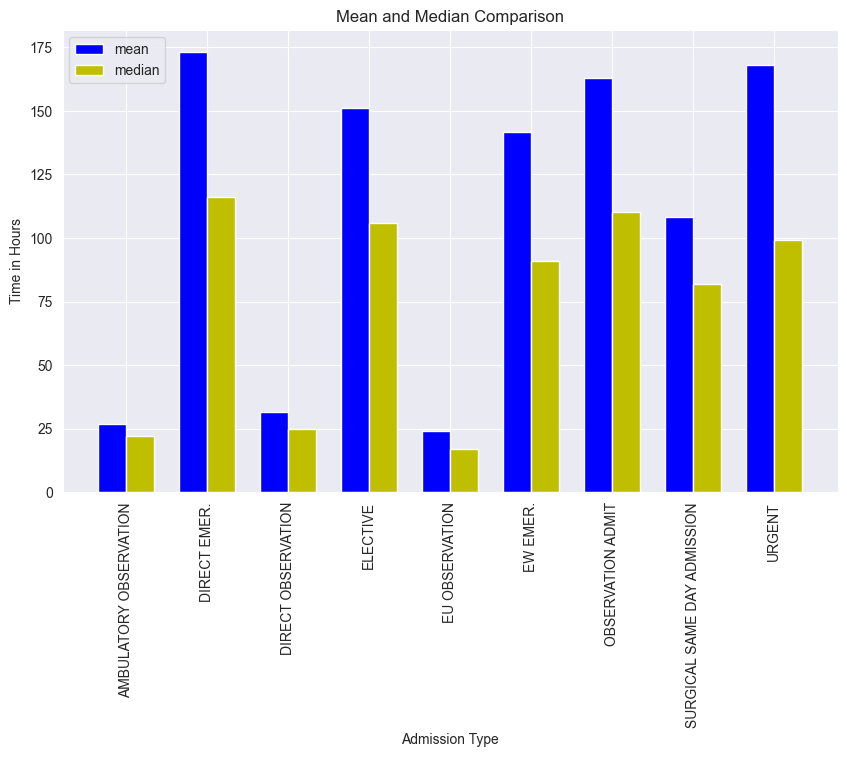

In [28]:
duration_by_type = admissions.groupby("admission_type")['admission_los_hours'].agg(['mean', 'median', 'count'])

categories = duration_by_type.index

bar_width = 0.35
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, duration_by_type['mean'], bar_width, label='mean', color ='b')
ax.bar(x + bar_width/2, duration_by_type['median'], bar_width, label='median', color='y')

ax.set_xlabel("Admission Type")
ax.set_ylabel("Time in Hours")
ax.set_title("Mean and Median Comparison")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend(loc='best')
plt.savefig("../visualizations/admission-length-of-stay-by-type.png")
plt.show()

### Length of Stay by Race - Admissions Table

Question: Is the Admission duration (length of stay) contains racial disparities?

In [29]:
admission_duration_by_race = admissions.groupby("race_grouped")['admission_los_hours'].median()

admission_duration_by_race

race_grouped
Asian                               64.716667
Black/African Descent               59.800000
Hispanic/Latino                     54.758333
Mixed or Other                      81.650000
Native American/Pacific Islander    67.600000
White/European Descent              69.416667
Name: admission_los_hours, dtype: float64

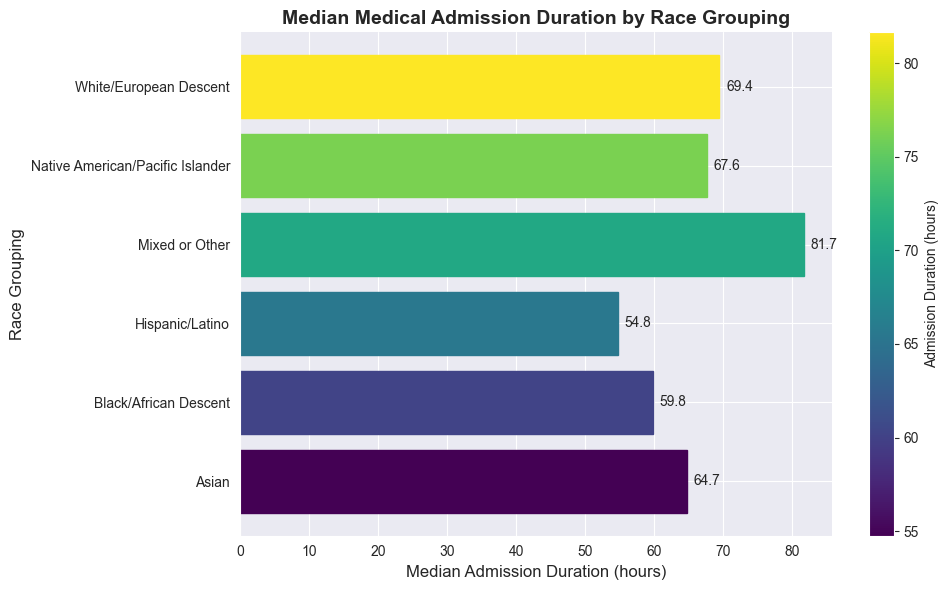

In [30]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal bar plot
bars = ax.barh(admission_duration_by_race.index, admission_duration_by_race.values)

# Customize the plot
ax.set_xlabel("Median Admission Duration (hours)", fontsize=12)
ax.set_ylabel("Race Grouping", fontsize=12)
ax.set_title("Median Medical Admission Duration by Race Grouping", fontsize=14, fontweight='bold')

# Add value labels to the end of each bar
for i, v in enumerate(admission_duration_by_race.values):
    ax.text(v + 1, i, f'{v:.1f}', va='center', fontsize=10)

# Adjust the layout and colors
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Color the bars with a gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(admission_duration_by_race), vmax=max(admission_duration_by_race)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # Associate colorbar with the specific axes
cbar.set_label('Admission Duration (hours)', fontsize=10)

# Save and show the plot
plt.savefig("../visualizations/admission-duration-by-race-grouped.png", dpi=300, bbox_inches='tight')
plt.show();

The grouping of races appears to be an informative feature

### Death Rate Analysis


In [31]:
admissions.deathtime.isna().sum()

534159

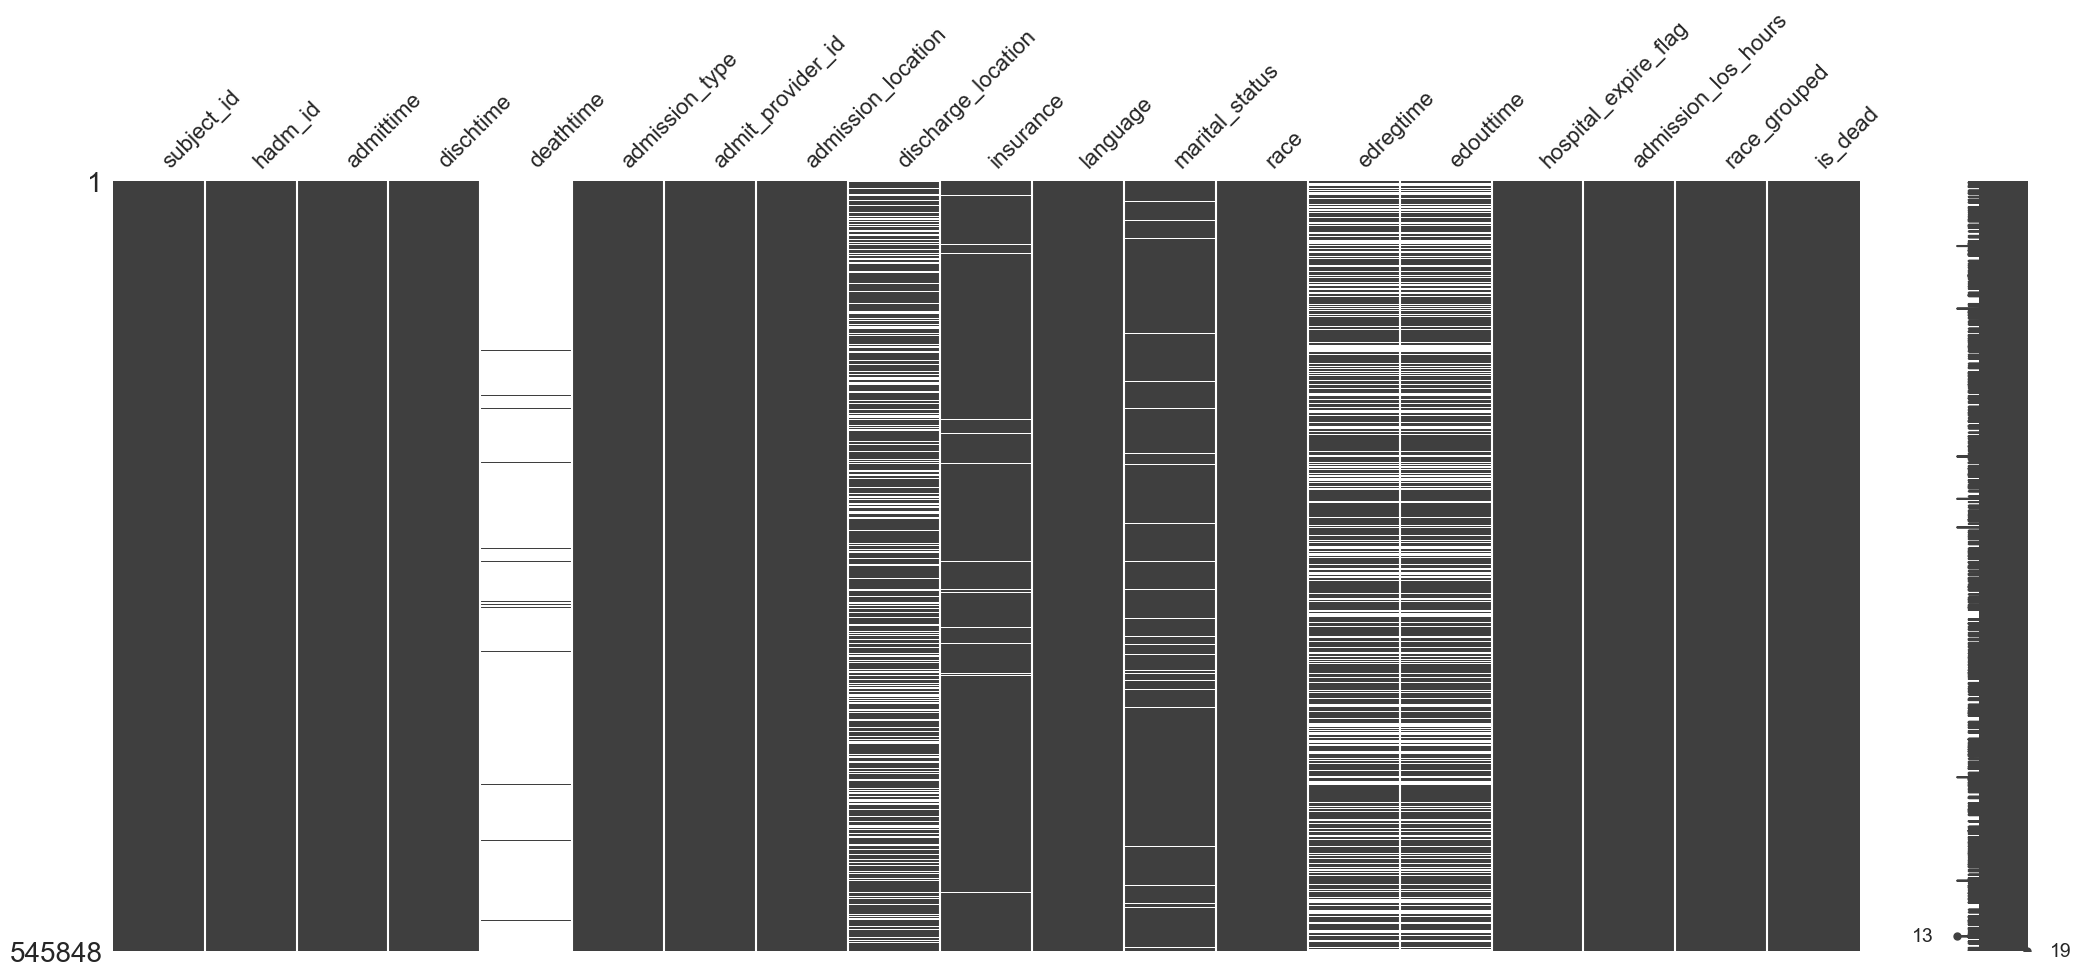

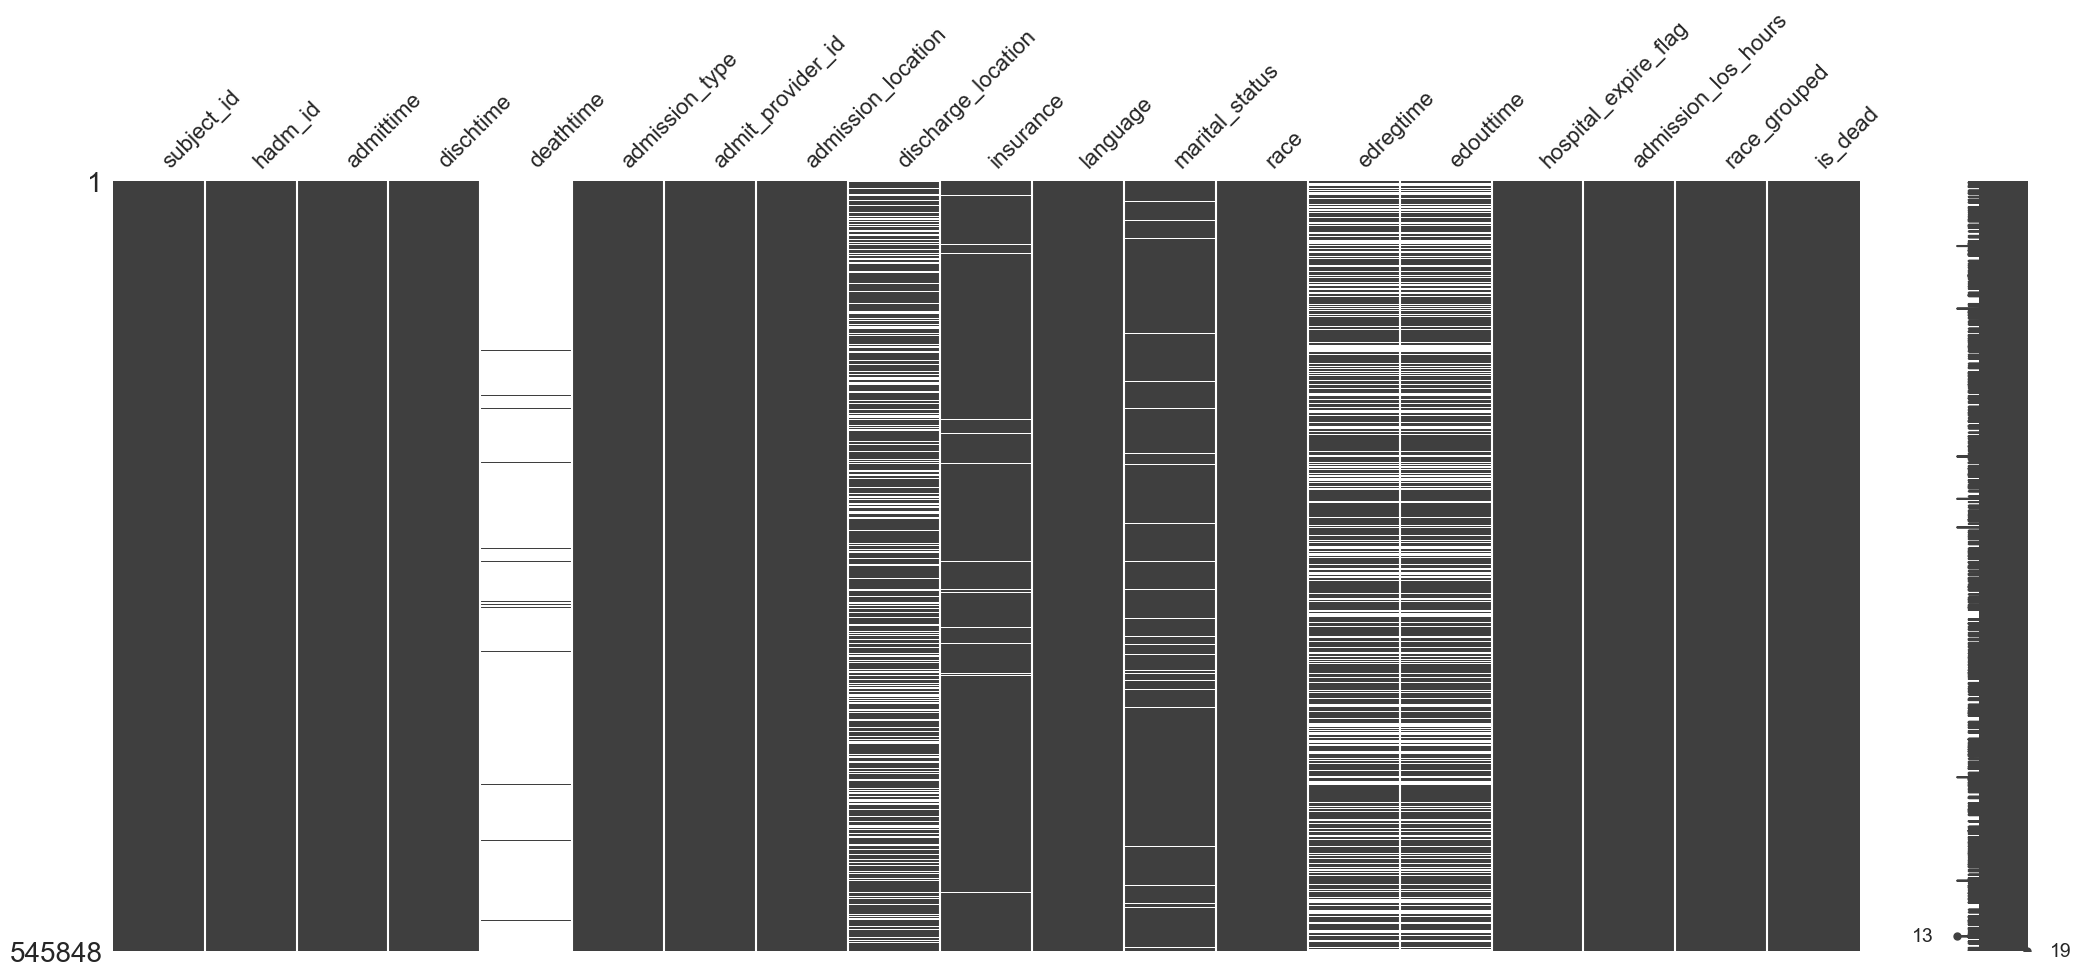

In [40]:
msno.matrix(admissions)
plt.show()

In [33]:
mortality_rate = 1 - admissions.deathtime.isna().sum() / len(admissions)

mortality_rate

0.021414386422593856

According to [National Institute of Health](https://www.ncbi.nlm.nih.gov/books/NBK588379/#:~:text=The%20number%20of%20hospitalizations%20during,from%201.9%20to%202.9%20percent.) The average annual mortality rate for hopstials is around 1-3 percent which makes it make sense

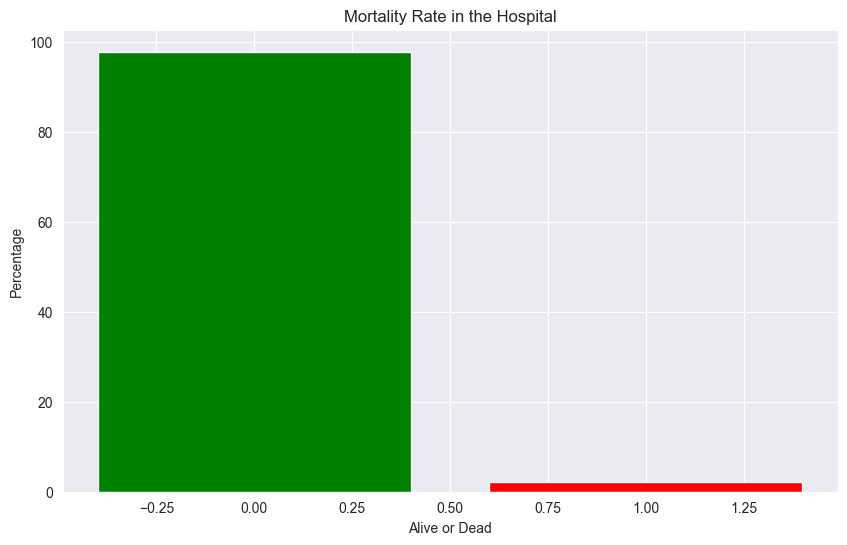

In [36]:
# lets be more visual
admissions['is_dead'] = admissions.deathtime.notna()

is_dead_counts = admissions['is_dead'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(is_dead_counts.index, is_dead_counts, color=['green', 'red'])
plt.title('Mortality Rate in the Hospital')
plt.xlabel('Alive or Dead')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

### What percentage of the patients admitted to the hospital were transferred to the Emergency Department (ED)

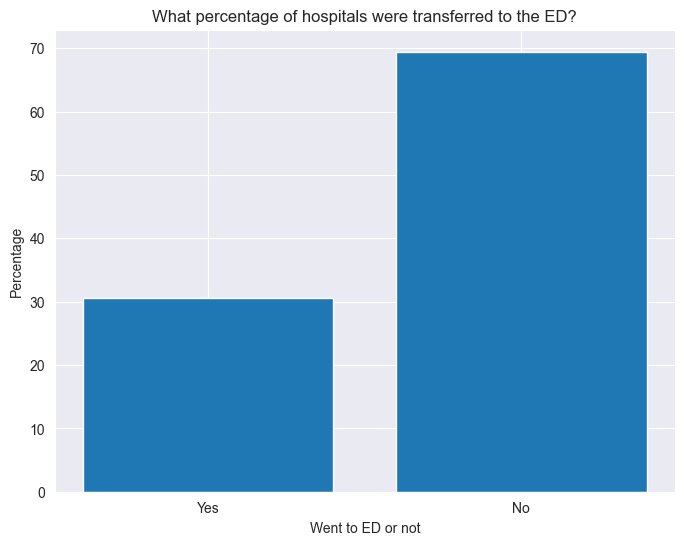

In [42]:
admissions['transfer_to_ed'] = admissions['edregtime'].notna()

# normalize the value counts to compute the percentage
transfer_to_ed_pct = admissions['transfer_to_ed'].value_counts(normalize=True) * 100

# plot
plt.figure(figsize=(8, 6))
plt.bar(transfer_to_ed_pct.index, transfer_to_ed_pct)
# set xtickslabels
plt.xticks([True, False], ['No', 'Yes'])

plt.title("What percentage of hospitals were transferred to the ED?")
plt.ylabel("Percentage")
plt.xlabel("Went to ED or not")
plt.show()

Marital Status Distribution:
marital_status
MARRIED     229065
SINGLE      206170
WIDOWED      56676
DIVORCED     40345
Name: count, dtype: int64

Average Length of Stay (hours) by Marital Status:
marital_status
DIVORCED    120.799391
WIDOWED     119.219259
MARRIED     115.235182
SINGLE      106.080171
Name: admission_los_hours, dtype: float64

One-way ANOVA Test Results:
F-statistic: 179.59889487645253
p-value: 2.1340383709822634e-116
There is a statistically significant correlation between marital status and length of stay.


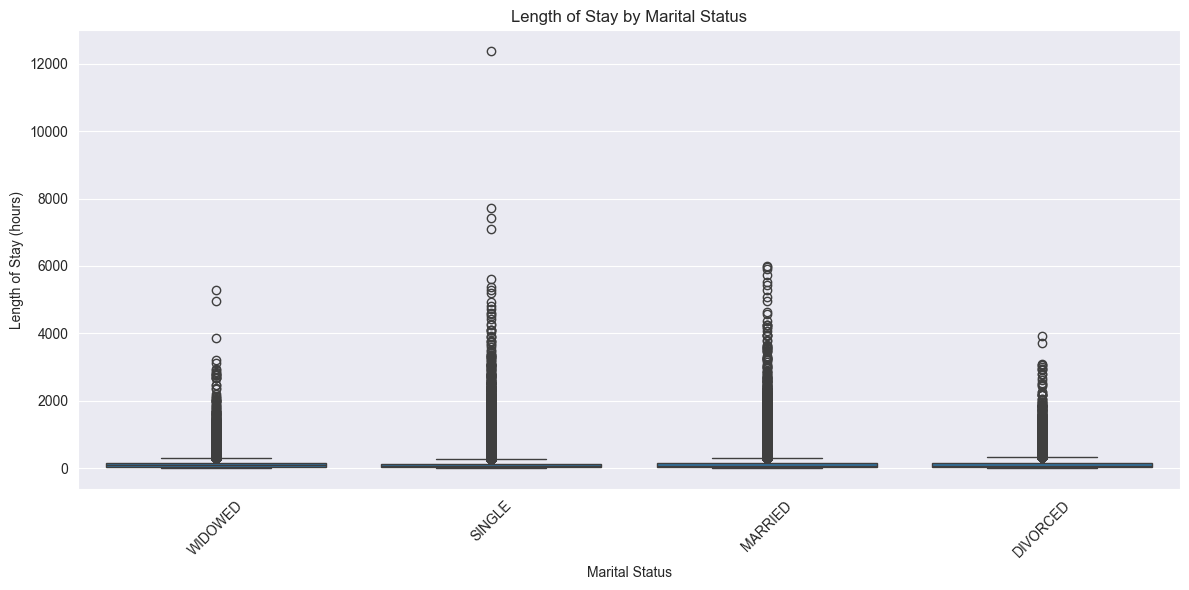

In [43]:
# Check if marital status correlates with length of stay (in hours)
print("Marital Status Distribution:")
print(admissions.marital_status.value_counts())

# Calculate average length of stay for each marital status
avg_los_by_marital_status = admissions.groupby('marital_status')['admission_los_hours'].mean().sort_values(ascending=False)

print("\nAverage Length of Stay (hours) by Marital Status:")
print(avg_los_by_marital_status)

# Perform one-way ANOVA test
from scipy import stats

marital_groups = [group for _, group in admissions.groupby('marital_status')['admission_los_hours']]
f_statistic, p_value = stats.f_oneway(*marital_groups)

print("\nOne-way ANOVA Test Results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant correlation between marital status and length of stay.")
else:
    print("There is no statistically significant correlation between marital status and length of stay.")

# Visualize the relationship
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='marital_status', y='admission_los_hours', data=admissions)
plt.title('Length of Stay by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Length of Stay (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Exploring Transfer Table

In [44]:
transfers.head()

# printout info
Utils.print_info(transfers)



DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 2413589, Columns: 7

Column Types:
  object: 4
  int64: 2
  float64: 1

Missing Values:
  hadm_id: 408985 (16.95%)
  outtime: 546123 (22.63%)

Numeric Columns Summary:
         subject_id       hadm_id   transfer_id
count  2.413589e+06  2.004604e+06  2.413589e+06
mean   1.501207e+07  2.499834e+07  3.500071e+07
std    2.879270e+06  2.888194e+06  2.885858e+06
min    1.000003e+07  2.000002e+07  3.000000e+07
25%    1.252288e+07  2.249433e+07  3.250405e+07
50%    1.502051e+07  2.499956e+07  3.500197e+07
75%    1.750674e+07  2.749853e+07  3.750182e+07
max    1.999999e+07  2.999994e+07  3.999999e+07

Categorical Columns Summary:
  eventtype:
    Unique values: 4
    Top 5 values: {'ED': 784408, 'discharge': 546024, 'admit': 546010, 'transfer': 537147}
  careunit:
    Unique values: 46
    Top 5 values: {'Emergency Department': 784408, 'UNKNOWN': 546196, 'Medicine': 191862, 'Emergency Department Observation': 101347, 'Discharge Loun

,subject_id,hadm_id,transfer_id,eventtype,careunit,intime,outtime
0,10000032,22595853.0,33258284,ED,Emergency Department,2180-05-06 19:17:00,2180-05-06 23:30:00
1,10000032,22595853.0,35223874,admit,Transplant,2180-05-06 23:30:00,2180-05-07 17:21:27
2,10000032,22595853.0,36904543,discharge,UNKNOWN,2180-05-07 17:21:27,NaN
3,10000032,22841357.0,34100253,discharge,UNKNOWN,2180-06-27 18:49:12,NaN
4,10000032,22841357.0,34703856,admit,Transplant,2180-06-26 21:31:00,2180-06-27 18:49:12


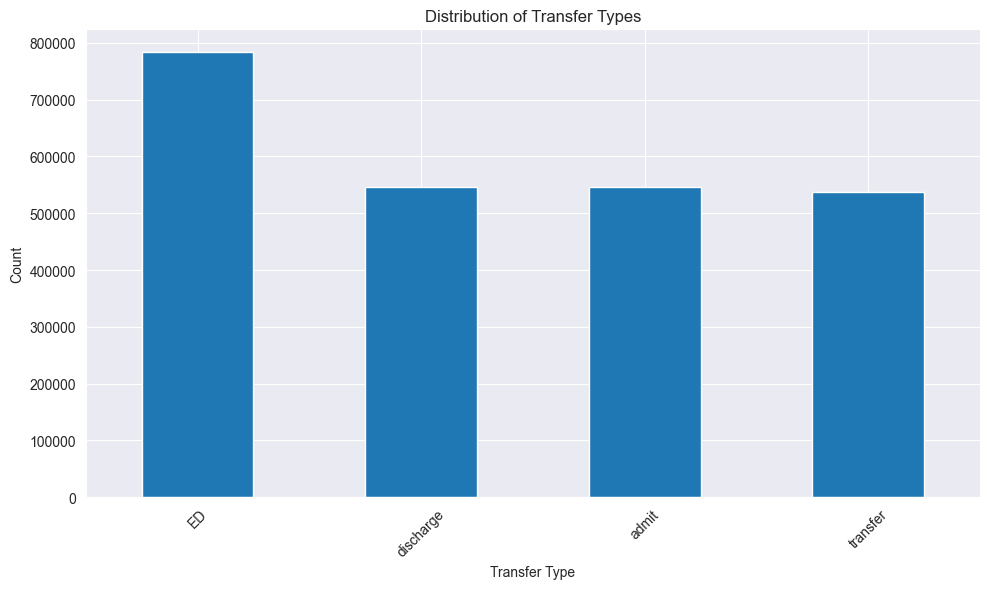

In [45]:
plt.figure(figsize=(10, 6))
transfers['eventtype'].value_counts().plot(kind='bar')
plt.title('Distribution of Transfer Types')
plt.xlabel('Transfer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../visualizations/transfer-types-distribution.png")
plt.show()

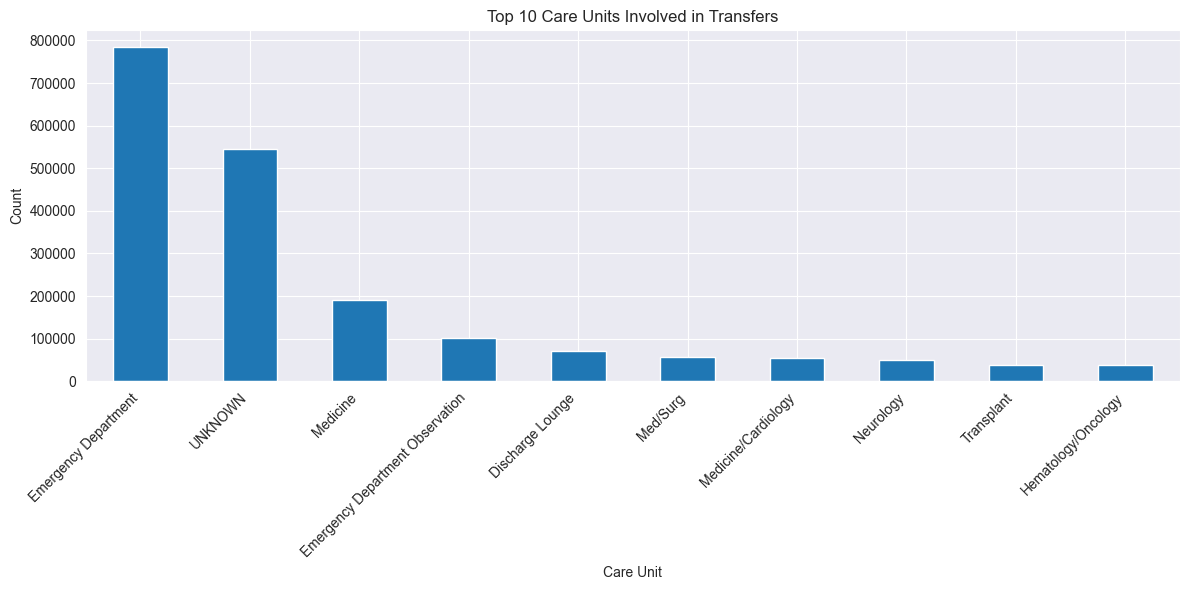

In [46]:
plt.figure(figsize=(12, 6))
transfers['careunit'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Care Units Involved in Transfers')
plt.xlabel('Care Unit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualizations/top_10_care_units_transfers.png')
plt.show(); plt.close()

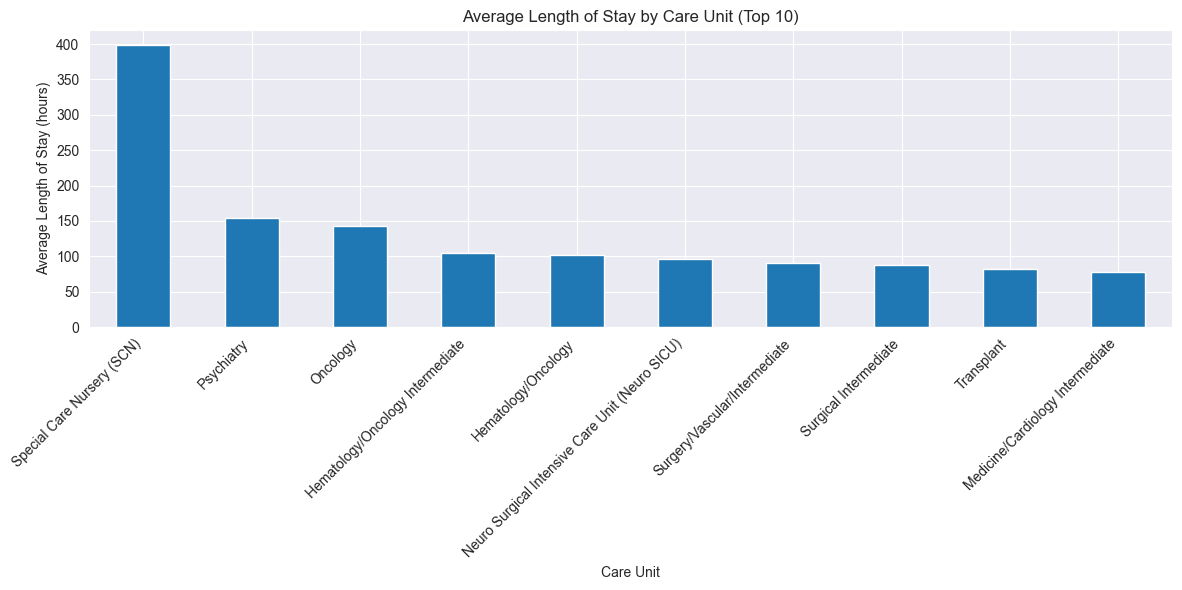

In [47]:
transfers['los'] = (pd.to_datetime(transfers['outtime']) - pd.to_datetime(transfers['intime'])).dt.total_seconds() / 3600

avg_los_by_unit = transfers.groupby('careunit')['los'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
avg_los_by_unit.plot(kind='bar')
plt.title('Average Length of Stay by Care Unit (Top 10)')
plt.xlabel('Care Unit')
plt.ylabel('Average Length of Stay (hours)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualizations/avg_los_by_care_unit.png')
plt.show()

In [55]:
import plotly.graph_objects as go
from collections import defaultdict

def create_sankey_data(df):
    # Filter for transfers from ED to other units
    ed_transfers = df[df['eventtype'] == 'transfer']
    
    links = defaultdict(int)
    for _, row in ed_transfers.iterrows():
        links[('Emergency Department', row['careunit'])] += 1
    
    source, target, value = [], [], []
    units = set(['Emergency Department'])
    for (src, tgt), count in links.items():
        units.add(tgt)
    
    unit_to_index = {unit: i for i, unit in enumerate(units)}
    
    for (src, tgt), count in links.items():
        source.append(unit_to_index[src])
        target.append(unit_to_index[tgt])
        value.append(count)
    
    return list(units), source, target, value

units, source, target, value = create_sankey_data(transfers)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = units,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Patient Flow from Emergency Department to Other Units", font_size=10)
fig.write_image("../visualizations/patient_flow_sankey_from_ed.png")
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## Exploring Triage

In [57]:
triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [59]:
triage.chiefcomplaint.nunique()

60406

In [58]:
# some descriptive statistics
triage.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity
count,4.250870e+05,4.250870e+05,400846.000000,407967.000000,404676.000000,404301.000000,406535.000000,405254.000000,418100.000000
mean,1.500871e+07,3.499735e+07,98.089509,85.068604,17.544445,98.399775,134.946205,77.439349,2.625102
std,2.878486e+06,2.888342e+06,0.951174,17.658812,2.320705,2.020108,22.272530,14.605996,0.708084
min,1.000003e+07,3.000001e+07,95.000000,20.000000,4.000000,70.000000,50.000000,20.000000,1.000000
25%,1.251789e+07,3.249799e+07,97.600000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000
50%,1.501628e+07,3.499395e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000
75%,1.749900e+07,3.750387e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000
max,1.999999e+07,3.999996e+07,107.000000,250.000000,60.000000,100.000000,250.000000,150.000000,5.000000


It appears there are mistakes for certain entries

-> For example heartrate cannot be 1228 bpm or sbp being 151103 

This is impossible we need to remove or fix these mistakes

In [60]:
Utils.min_max_for_cols(triage)

{'subject_id': {'min': 10000032, 'max': 19999987},
 'stay_id': {'min': 30000012, 'max': 39999965},
 'temperature': {'min': 95.0, 'max': 107.0},
 'heartrate': {'min': 20.0, 'max': 250.0},
 'resprate': {'min': 4.0, 'max': 60.0},
 'o2sat': {'min': 70.0, 'max': 100.0},
 'sbp': {'min': 50.0, 'max': 250.0},
 'dbp': {'min': 20.0, 'max': 150.0},
 'acuity': {'min': 1.0, 'max': 5.0}}

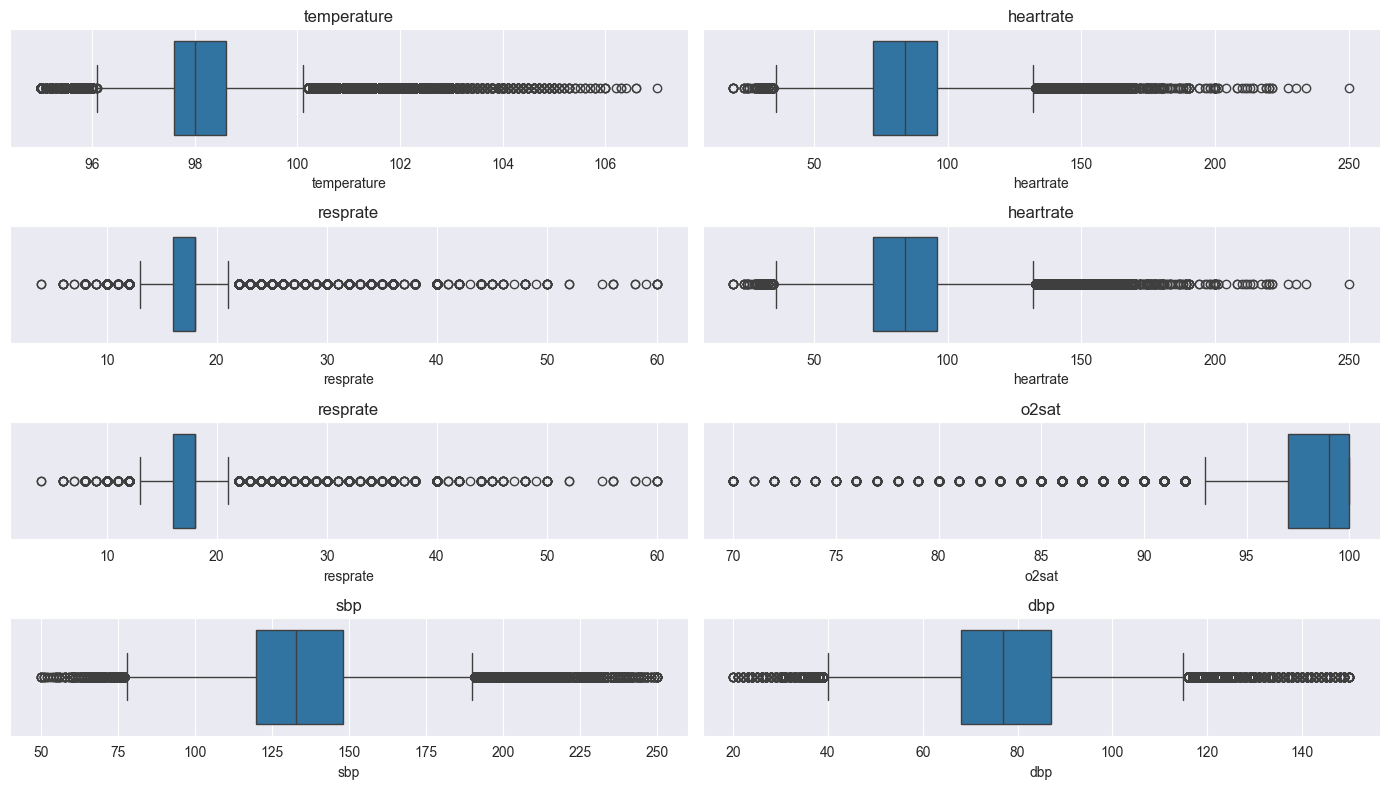

In [61]:
fig, axes = plt.subplots(4, 2, figsize=(14, 8))

axes = axes.ravel()
num_cols = ['temperature', 'heartrate', 'resprate', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']

for i, col in enumerate(triage[num_cols].columns):
    g = sns.boxplot(x=col, data=triage, ax = axes[i])
    g.set_title(f'{col}')

plt.tight_layout()
# save to visualizations
plt.show()

**Vital Signs Reference Ranges**

**Temperature:**

* Valid range: 95.0°F - 107.6°F (35°C - 42°C)
* Normal range: 97.8°F - 99.1°F (36.5°C - 37.3°C)
* Source: The average normal core temperature is generally considered to be between 97.8°F and 99.1°F (36.5°C to 37.3°C). Temperatures outside the wider range of 95.0°F - 107.6°F are likely errors or extreme medical emergencies.

**Heart Rate:**

* Valid range: 20 - 250 beats per minute
* Normal range for adults: 60 - 100 beats per minute
* Source: For adults, a normal resting heart rate is between 60 and 100 beats per minute (bpm). The wider range accounts for extreme bradycardia and tachycardia.

**Respiratory Rate:**

* Valid range: 4 - 60 breaths per minute
* Normal range for adults: 12 - 20 breaths per minute
* Source: A normal respiratory rate for an adult at rest is 12 to 20 breaths per minute.

**Oxygen Saturation (O2sat):**

* Valid range: 70% - 100%
* Normal range: 95% - 100%
* Source: Normal oxygen levels are greater than 92% on room air. Values below 70% are extremely rare and likely errors.

**Systolic Blood Pressure (SBP):**

* Valid range: 50 - 250 mmHg
* Normal range for adults: 90 - 120 mmHg
* Source: Normal blood pressure is between 90/60 mmHg and 120/80 mmHg.

**Diastolic Blood Pressure (DBP):**

* Valid range: 20 - 150 mmHg
* Normal range for adults: 60 - 80 mmHg
* Source: Normal blood pressure is between 90/60 mmHg and 120/80 mmHg

**Sources:**

* https://emedicine.medscape.com/article/2172054-overview?form=fpf
* https://soteradigitalhealth.com/blog/vital-signs-how-to-measure-and-whats-the-normal-range
* https://www.medicalnewstoday.com/articles/vital-signs
* https://www.healthline.com/health/dangerous-heart-rate

In [62]:
# set thresholds based on reasonable medical ranges
valid_ranges = {
    'temperature': (95.0, 107.6),
    'heartrate': (20, 250),      
    'resprate': (4, 60),
    'o2sat': (70, 100),            
    'sbp': (50, 250),
    'dbp': (20, 150)               
}

# function to clean the outliers based on thresholds
def clean_outliers(df, column, valid_range):
    lower, upper = valid_range
    df[column] = df[column].apply(lambda x: x if lower <= x <= upper else None)  # Set outliers to None
    return df

# apply the cleaning to the appropriate columns
for column, valid_range in valid_ranges.items():
    triage = clean_outliers(triage, column, valid_range)

# drop rows with any remaining NaN values in the key columns (optional)
triage_cleaned = triage.dropna(subset=valid_ranges.keys())

In [63]:
triage_cleaned[num_cols].describe()

,temperature,heartrate,resprate,heartrate,resprate,o2sat,sbp,dbp
count,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000,390799.000000
mean,98.088897,84.953636,17.512279,84.953636,17.512279,98.418361,135.030745,77.474362
std,0.948370,17.390274,2.229031,17.390274,2.229031,1.964901,22.059855,14.530137
min,95.000000,20.000000,4.000000,20.000000,4.000000,70.000000,50.000000,20.000000
25%,97.600000,72.000000,16.000000,72.000000,16.000000,97.000000,120.000000,68.000000
50%,98.000000,84.000000,18.000000,84.000000,18.000000,99.000000,133.000000,77.000000
75%,98.600000,96.000000,18.000000,96.000000,18.000000,100.000000,148.000000,87.000000
max,106.600000,250.000000,60.000000,250.000000,60.000000,100.000000,250.000000,150.000000


In [64]:
# we could explore the chief complaint and map to a smaller dimension of topics/keywords
triage.chiefcomplaint.str.lower().value_counts()

chiefcomplaint
abd pain                       15729
chest pain                     13879
s/p fall                        7544
dyspnea                         7401
headache                        5106
                               ...  
lower back pain, r weakness        1
bite, ankle redness                1
laceration, bike collision         1
l arm pain, leg pain               1
? seizure today                    1
Name: count, Length: 58898, dtype: int64

We see that the main chief complain is abdominal pain and chest pain. 

In [65]:
triage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425087 entries, 0 to 425086
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   subject_id      425087 non-null  int64  
 1   stay_id         425087 non-null  int64  
 2   temperature     400846 non-null  float64
 3   heartrate       407967 non-null  float64
 4   resprate        404676 non-null  float64
 5   o2sat           404301 non-null  float64
 6   sbp             406535 non-null  float64
 7   dbp             405254 non-null  float64
 8   pain            412154 non-null  object 
 9   acuity          418100 non-null  float64
 10  chiefcomplaint  425064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 35.7+ MB


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = triage_cleaned[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'acuity']]
X = X.dropna()

sc = StandardScaler()
sc.fit_transform(X)

# perform pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca[:5]

array([[-72.38999429,   4.71349844],
       [-33.19549341, -13.04817022],
       [-33.81728037,  19.83348868],
       [-12.67277252,   7.76127454],
       [-47.32897254,  -7.26863403]])

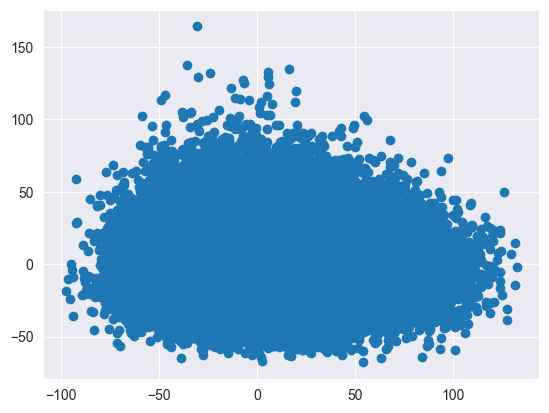

In [67]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

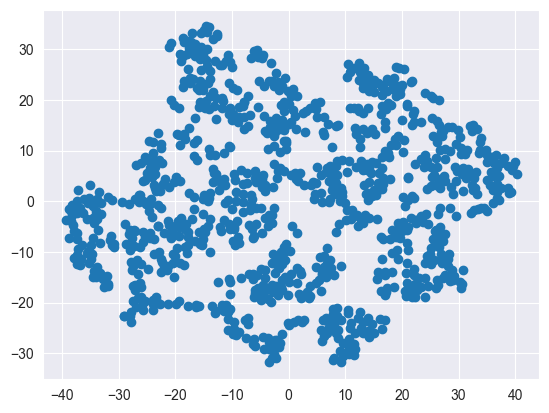

In [68]:
tsne = TSNE(n_components=2)
# tsne scales poorly -> use a sample
X_tnse = tsne.fit_transform(X.sample(1000, replace=True))

plt.scatter(X_tnse[:, 0], X_tnse[:, 1])
plt.show()

In [69]:
# perform UMAP
import umap

# Initialize the UMAP with desired parameters
umap_reducer = umap.UMAP(n_components=2)

# sample the data
X_sample = X.sample(10000, replace=False)

# Fit and transform the data
X_umap = umap_reducer.fit_transform(X_sample)

# lets see the first 5
print(X_umap[:5])

ModuleNotFoundError: No module named 'umap'

In [ ]:
# Create a DataFrame for visualization
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Acuity'] = X_sample['acuity'].values

# Plot the UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    hue='Acuity',
    palette='viridis',
    data=umap_df,
    legend='full',
    alpha=0.7
)
plt.title('UMAP Projection of ED Triage Data', fontsize=16)
plt.xlabel('UMAP Dimension 1', fontsize=12)
plt.ylabel('UMAP Dimension 2', fontsize=12)
plt.legend(title='Acuity')
plt.tight_layout()
plt.savefig('../visualizations/UMAP_ED_Triage.png')
plt.show()

### What is the distribution of acuity?

In [70]:
acuity_counts = triage_cleaned.acuity.value_counts()

acuity_counts

acuity
3.0    217232
2.0    130707
4.0     27592
1.0     14076
5.0      1036
Name: count, dtype: int64

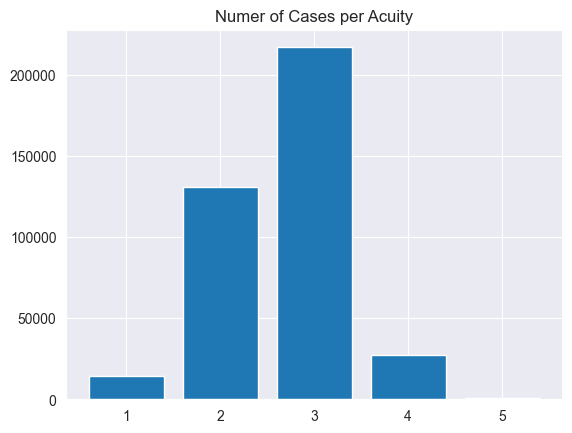

In [71]:
plt.bar(acuity_counts.index, acuity_counts)
plt.title("Numer of Cases per Acuity")
plt.show()

We could try to group length of stay at admission and ED level to see if there is a relationship between the two. We can use the `groupby` function to group the data by the `hadm_id` and `ed_level` columns. Then we can use the `size` function to count the number of rows in each group.

In [72]:
# merging with admissions
admissions_triage = admissions.merge(triage_cleaned, on ='subject_id', how = 'inner')

# merge with triage
triage_edstays = triage_cleaned.merge(ed_stays, on = 'subject_id', how = 'inner')

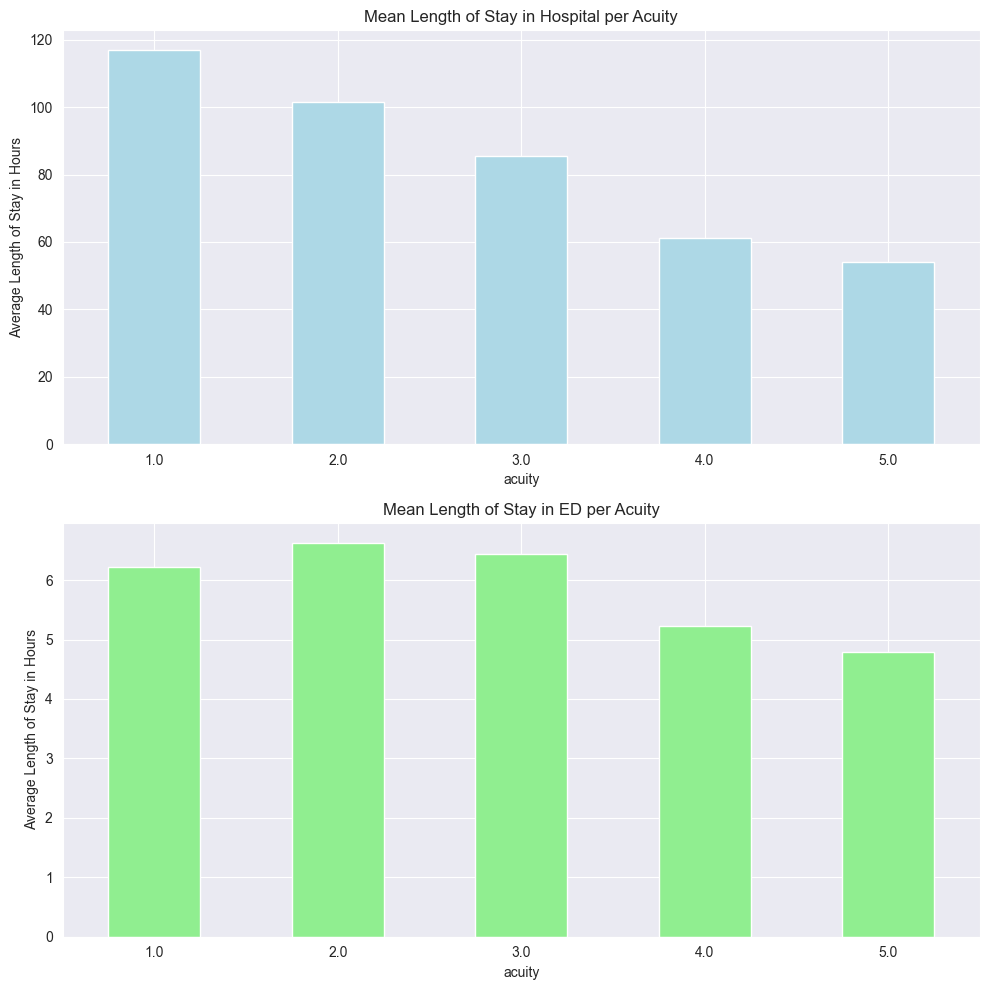

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Hospital stay plot
admissions_triage.groupby('acuity')['admission_los_hours'].mean().plot.bar(ax=ax1, color='lightblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_title("Mean Length of Stay in Hospital per Acuity")
ax1.set_ylabel("Average Length of Stay in Hours")

# ED stay plot
triage_edstays.groupby('acuity')['ed_los_hours'].mean().plot.bar(ax=ax2, color='lightgreen')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_title("Mean Length of Stay in ED per Acuity")
ax2.set_ylabel("Average Length of Stay in Hours")

plt.tight_layout()
plt.savefig('../visualizations/mean-stay-per-acuity-combined.png')
plt.show()

### Processing the chiefcomplaints feature

In [74]:
triage_cleaned.chiefcomplaint

0                                      Hypotension
1                   Abd pain, Abdominal distention
2                                  n/v/d, Abd pain
3                             Abdominal distention
4         Abdominal distention, Abd pain, LETHAGIC
                            ...                   
425081                              L Leg weakness
425082                                Abnormal MRI
425083                        Abd pain, Wound eval
425084                        Abd pain, Wound eval
425085        Altered mental status, Substance use
Name: chiefcomplaint, Length: 390799, dtype: object

In [75]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/julienh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julienh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/julienh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

# apply preprocessing to each row in your column
triage_cleaned.loc[:, 'processed_complaints'] = triage_cleaned['chiefcomplaint'].apply(preprocess_text)

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_56323/729482915.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
from gensim.corpora import Dictionary

# create a dictionary representation of the documents
dictionary = Dictionary(triage_cleaned['processed_complaints'])

# filter extremes (you can fine-tune these parameters)
dictionary.filter_extremes(no_below=10, no_above=0.5)

# create a Bag-of-Words (BoW) corpus
corpus = [dictionary.doc2bow(doc) for doc in triage_cleaned['processed_complaints']]

In [78]:
from gensim.models import LdaModel

# Set the number of topics you want to identify (e.g., 5 topics)
num_topics = 5

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# Show the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.145*"r" + 0.121*"pain" + 0.109*"transfer" + 0.060*"weakness" + 0.033*"abnormal" + 0.032*"arm" + 0.032*"lab" + 0.026*"syncope" + 0.025*"leg" + 0.023*"left"
Topic 1: 0.148*"sp" + 0.138*"fall" + 0.130*"dyspnea" + 0.063*"dizziness" + 0.057*"swelling" + 0.049*"cough" + 0.047*"si" + 0.033*"throat" + 0.032*"mvc" + 0.030*"sore"
Topic 2: 0.105*"fever" + 0.074*"etoh" + 0.051*"injury" + 0.041*"ili" + 0.040*"laceration" + 0.037*"hand" + 0.035*"vomiting" + 0.033*"head" + 0.032*"finger" + 0.028*"abnormal"
Topic 3: 0.329*"pain" + 0.108*"abd" + 0.086*"chest" + 0.053*"back" + 0.043*"abdominal" + 0.029*"nv" + 0.027*"eval" + 0.027*"lower" + 0.023*"wound" + 0.016*"nausea"
Topic 4: 0.185*"l" + 0.178*"pain" + 0.088*"headache" + 0.041*"knee" + 0.037*"injury" + 0.033*"leg" + 0.030*"right" + 0.025*"diarrhea" + 0.025*"foot" + 0.024*"flank"


In [79]:
def assign_topic(lda_model, corpus, dictionary, complaint):
    bow = dictionary.doc2bow(complaint)
    topic_distribution = lda_model.get_document_topics(bow)
    # Select the topic with the highest probability
    return max(topic_distribution, key=lambda x: x[1])[0]

triage_cleaned.loc[:, 'topic'] = triage_cleaned['processed_complaints'].apply(lambda x: assign_topic(lda_model, corpus, dictionary, x))

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_56323/1242420180.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
triage_cleaned[['chiefcomplaint', 'topic']]

,chiefcomplaint,topic
0,Hypotension,2
1,"Abd pain, Abdominal distention",3
2,"n/v/d, Abd pain",3
3,Abdominal distention,3
4,"Abdominal distention, Abd pain, LETHAGIC",3
...,...,...
425081,L Leg weakness,4
425082,Abnormal MRI,2
425083,"Abd pain, Wound eval",3
425084,"Abd pain, Wound eval",3


/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_56323/320773321.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



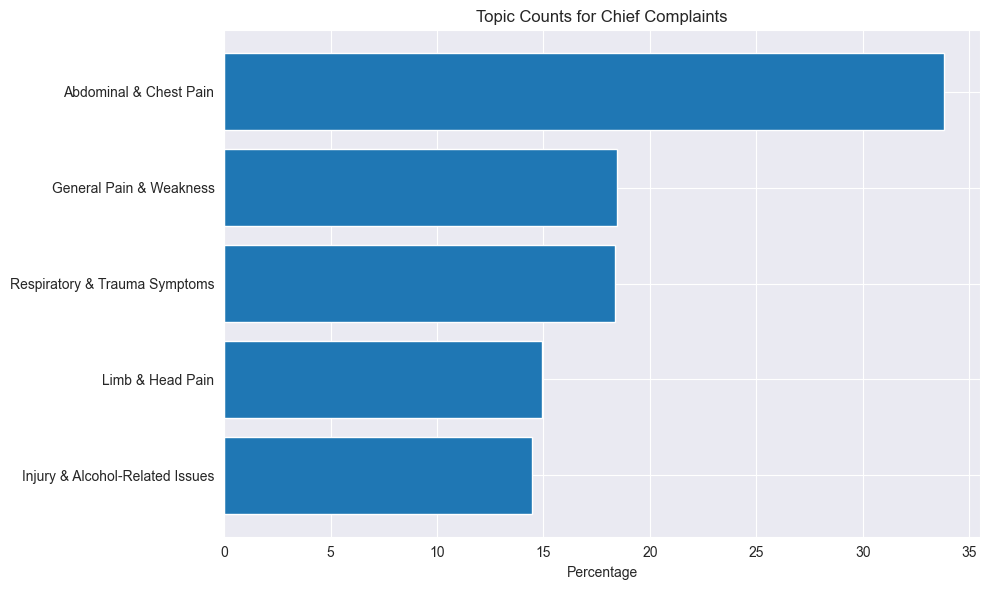

In [81]:
topic_labels = {
    0: "General Pain & Weakness",
    1: "Respiratory & Trauma Symptoms",
    2: "Injury & Alcohol-Related Issues",
    3: "Abdominal & Chest Pain",
    4: "Limb & Head Pain"
}

triage_cleaned.loc[:, 'topic_label'] = triage_cleaned['topic'].map(topic_labels)

topic_counts = triage_cleaned['topic_label'].value_counts(normalize=True) * 100
topic_counts_sorted = topic_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(topic_counts_sorted.index, topic_counts_sorted.values)
plt.title("Topic Counts for Chief Complaints")
plt.xlabel("Percentage")
plt.tight_layout()
plt.savefig("../visualizations/topic-counts-complaints.png")
plt.show()

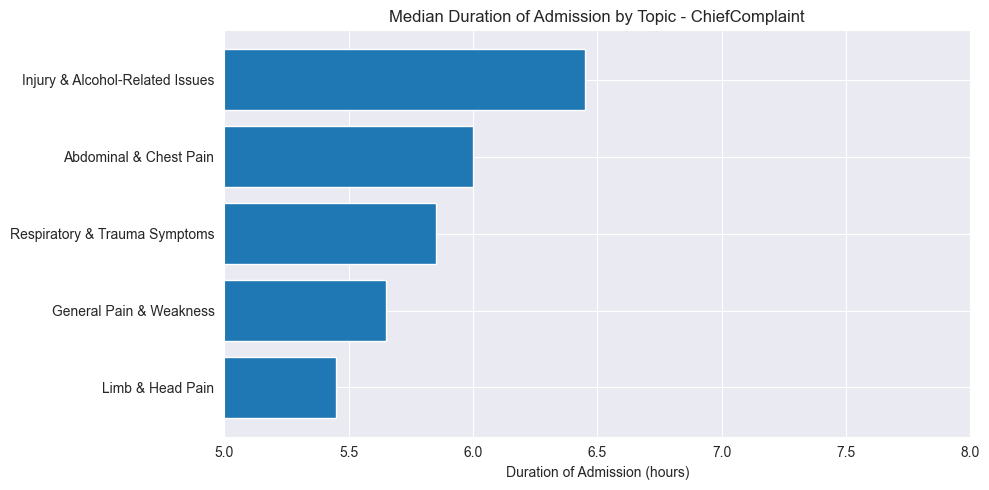

In [82]:
# explore duration by topic counts

stay_by_topic = triage_cleaned.merge(ed_stays, on = 'subject_id', how='inner')[['topic_label', 'ed_los_hours']]

plt.figure(figsize=(10, 5))
median_duration = stay_by_topic.groupby("topic_label")['ed_los_hours'].median().sort_values(ascending=True)
plt.barh(median_duration.index, median_duration.values)
plt.title("Median Duration of Admission by Topic - ChiefComplaint")
plt.xlabel("Duration of Admission (hours)")
# zoom in
plt.xlim(5, 8)
plt.tight_layout()
plt.savefig("../visualizations/admission-duration-by-topic.png")
plt.show()

We see that Limb and Head Pain complaints are the shorted durations of stay. Injury and Alcohol related issues are the longest durations of stay.

We could make sense of this by hypothesizing that limb and head pain complaints are taken more seriously as the potential for serious injury is higher. This could be due to the fact that limb and head pain complaints are more likely to be related to medical conditions, while injury complaints are more likely to be related to accidents or work-related issues.

#### Most common acuity per Topic

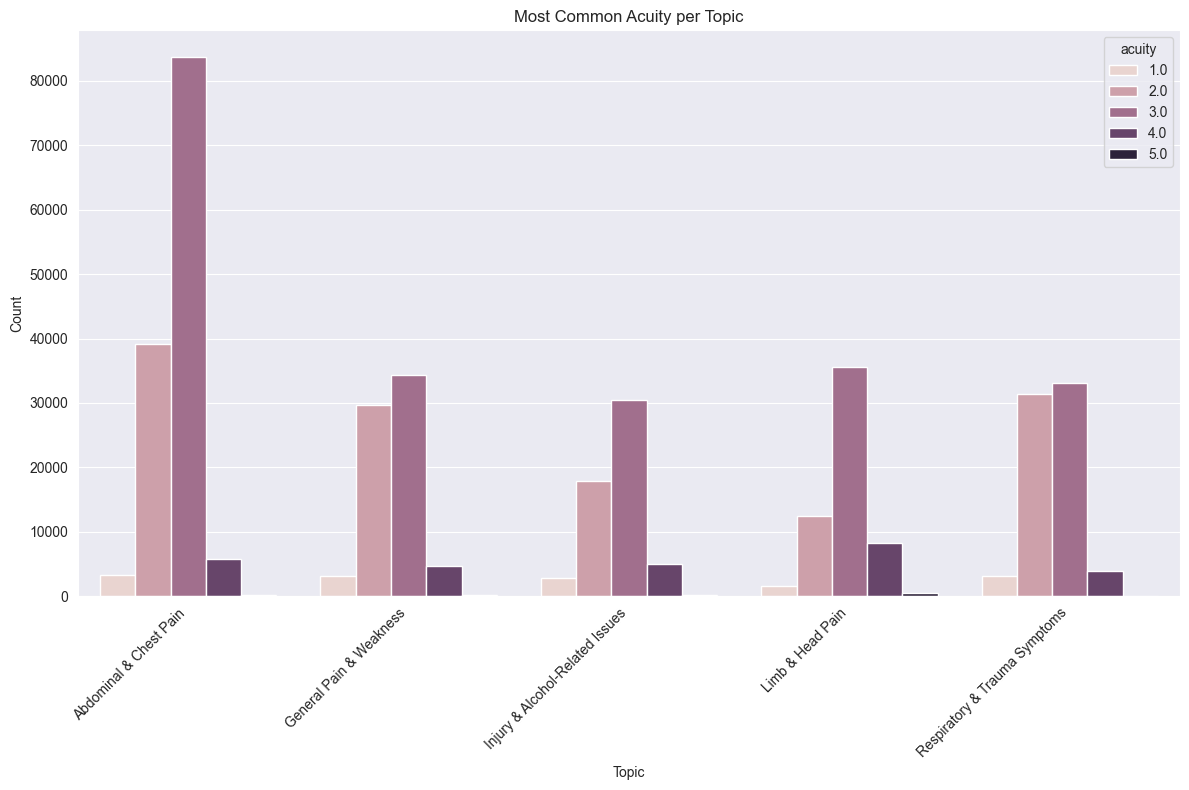

In [83]:
# group by topic and then count the acuity
acuity_by_topic = triage_cleaned.groupby(['topic_label', 'acuity']).size().reset_index(name='count')

# plot the acuity distribution for each topic
plt.figure(figsize=(12, 8))
sns.barplot(x='topic_label', y='count', hue='acuity', data=acuity_by_topic)
plt.title("Most Common Acuity per Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../visualizations/acuity-by-topic.png")
plt.show()

We can see that an acuity of 5.0 is the least common and only present in limb and head pain. We see that the distribution of acutiy is skewed towards the lower end of the scale and is similar for each topic. 

## Exploring VitalSigns Table

Contrary to the Triage Table, which records vital signs when first initially seen, the vital signs contains measurements for each (subject_id, stay_id) pair

In [84]:
Utils.print_info(vitalsigns)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 1564610, Columns: 11

Column Types:
  float64: 6
  object: 3
  int64: 2

Missing Values:
  temperature: 564968 (36.11%)
  heartrate: 69710 (4.46%)
  resprate: 89393 (5.71%)
  o2sat: 135836 (8.68%)
  sbp: 81256 (5.19%)
  dbp: 81256 (5.19%)
  rhythm: 1504960 (96.19%)
  pain: 443266 (28.33%)

Numeric Columns Summary:
         subject_id       stay_id    temperature     heartrate      resprate         o2sat           sbp           dbp
count  1.564610e+06  1.564610e+06  999642.000000  1.494900e+06  1.475217e+06  1.428774e+06  1.483354e+06  1.483354e+06
mean   1.500224e+07  3.500079e+07      97.999308  8.122277e+01  1.777930e+01  9.791336e+01  1.284333e+02  7.435518e+01
std    2.873032e+06  2.888296e+06       8.193808  1.795872e+01  7.840819e+01  1.474334e+01  2.294265e+01  1.799864e+02
min    1.000003e+07  3.000001e+07       0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    1.251479e+07  3.2499

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


This dataset has a lot of missing values, we can visualize the missingness with missingno library

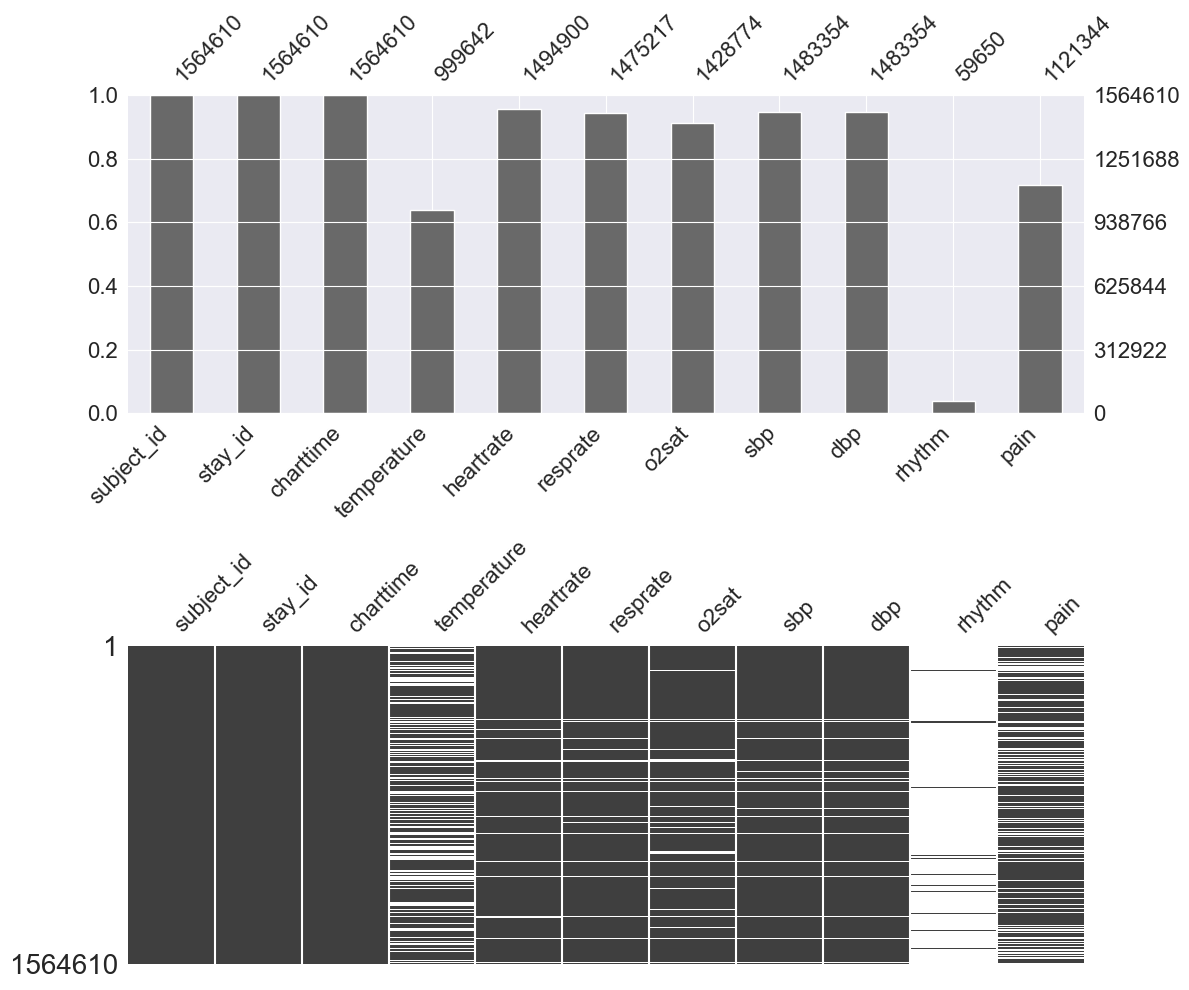

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

msno.bar(vitalsigns, ax = axes[0])
msno.matrix(vitalsigns, ax = axes[1], sparkline=False)

plt.tight_layout()
plt.show()

We can see that the rhythm column contains large amount of missing data.

For `pain`, we see evenly missingness, we could assume that at every 4 hour check, the pain level has not changed and the person doesn't want to report new information. We could impute using forward or backward fill then.

The most realiable columns to track over time appears to `heartrate`, `resprate`, `o2sat`, `sbp`, and `dbp`

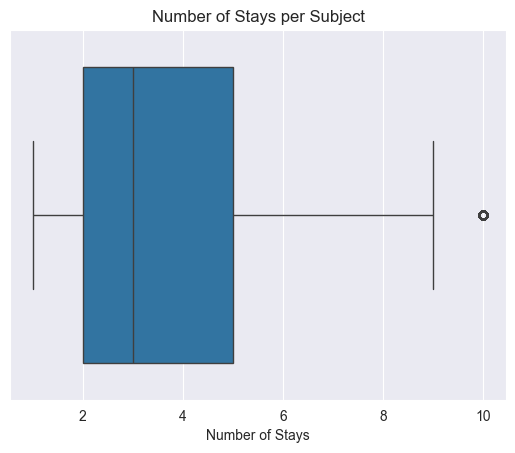

In [86]:
# lets see the number of stays per subject
num_stays_per_subject = vitalsigns.groupby('subject_id').agg(num_stays = ('stay_id', 'count')).reset_index()
num_stays_per_subject = num_stays_per_subject[num_stays_per_subject['num_stays'] <= 10]

sns.boxplot(x = num_stays_per_subject['num_stays'])
plt.title("Number of Stays per Subject")
plt.xlabel("Number of Stays")
plt.savefig('../visualizations/num-stays-per-subject.png')
plt.show()

In [87]:
vitalsigns.groupby('stay_id')[['heartrate', 'resprate', 'sbp', 'dbp']].mean()

,heartrate,resprate,sbp,dbp
stay_id,,,,
30000012,88.000000,15.666667,135.666667,49.666667
30000017,70.000000,20.000000,142.000000,90.000000
30000038,70.666667,19.333333,142.666667,64.333333
30000039,88.400000,19.200000,170.166667,89.166667
30000094,74.400000,19.000000,115.400000,77.400000
...,...,...,...,...
39999933,59.000000,16.000000,108.000000,66.000000
39999939,72.428571,16.666667,122.600000,80.600000
39999953,81.000000,16.000000,124.000000,86.000000


## Exploring Diagnosis Table

In [88]:
Utils.print_info(diagnosis)


DataFrame Information for: Unnamed DataFrame

Shape:
  Rows: 899050, Columns: 6

Column Types:
  int64: 4
  object: 2

Missing Values:
  No missing values

Numeric Columns Summary:
         subject_id       stay_id        seq_num    icd_version
count  8.990500e+05  8.990500e+05  899050.000000  899050.000000
mean   1.500838e+07  3.500095e+07       1.929149       9.507241
std    2.879810e+06  2.888942e+06       1.159710       0.499948
min    1.000003e+07  3.000001e+07       1.000000       9.000000
25%    1.251347e+07  3.250347e+07       1.000000       9.000000
50%    1.502022e+07  3.499600e+07       2.000000      10.000000
75%    1.750406e+07  3.751290e+07       2.000000      10.000000
max    1.999999e+07  3.999996e+07       9.000000      10.000000

Categorical Columns Summary:
  icd_code:
    Unique values: 13199
    Top 5 values: {'4019': 26816, 'I10': 21264, 'R079': 13016, '78650': 12398, '25000': 12026}
  icd_title:
    Unique values: 13172
    Top 5 values: {'HYPERTENSION NOS': 268

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [89]:
# number of unique icd codes
diagnosis.icd_code.nunique()

13199

In [90]:
diagnosis.icd_version.unique()

array([ 9, 10])

We verify there are the two icd versions 9 and 10

In [91]:
diagnosis.icd_version.value_counts()

icd_version
10    456035
9     443015
Name: count, dtype: int64

We can see that the icd versions are balanced, we can explore further to see if it depends on date of admission.

In [92]:
diagnosis_icd9 = diagnosis[diagnosis['icd_version'] == 9]
diagnosis_icd10 = diagnosis[diagnosis['icd_version'] == 10]

diagnosis_icd9.icd_code.nunique(), diagnosis_icd10.icd_code.nunique()

(4684, 8526)

Lets get an idea of the structure of the icd codes for icd 9 and icd 10

In [93]:
diagnosis_icd9.head(10)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
5,10000032,33258284,3,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
6,10000032,33258284,4,V08,9,ASYMPTOMATIC HIV INFECTION
7,10000032,35968195,1,5715,9,CIRRHOSIS OF LIVER NOS
8,10000032,35968195,2,78900,9,ABDOMINAL PAIN UNSPEC SITE
9,10000032,35968195,3,V08,9,ASYMPTOMATIC HIV INFECTION


In [94]:
from striprtf.striprtf import rtf_to_text

with open('../Data/icd9.rtf', 'r') as file:
    rtf_content = file.read()

text = rtf_to_text(rtf_content)

#print(text)

In [95]:
# Function to process the ICD text and extract mappings
import re
import pandas as pd

def process_icd_text(icd_text):
    """
    Processes the ICD text and returns a DataFrame mapping codes to categories and subcategories.
    """
    # Initialize variables
    data = []
    current_category = ''
    current_subcategory = ''
    
    # Split the text into lines
    lines = icd_text.strip().split('\n')
    
    # Define regex patterns
    category_pattern = re.compile(r'^\d+\.\s+(.*)$')
    subcategory_pattern = re.compile(r'^([A-Z][^\(]+)\((\d{3}-\d{3})\)$')
    code_pattern = re.compile(r'^(\d{3})\s+(.*)$')
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
        
        # Check for category lines (e.g., "1. INFECTIOUS AND PARASITIC DISEASES")
        category_match = category_pattern.match(line)
        if category_match:
            current_category = category_match.group(1).title()
            continue
        
        # Check for subcategory lines (e.g., "Intestinal infectious diseases (001-009)")
        subcategory_match = subcategory_pattern.match(line)
        if subcategory_match:
            current_subcategory = subcategory_match.group(1).strip().title()
            continue
        
        # Check for code lines (e.g., "001 Cholera")
        code_match = code_pattern.match(line)
        if code_match:
            code = code_match.group(1)
            title = code_match.group(2).title()
            data.append({
                'icd_code': code,
                'category': current_category,
                'subcategory': current_subcategory,
                'description': title
            })
    
    # Create a DataFrame from the extracted data
    icd_df = pd.DataFrame(data)
    return icd_df

icd9_codes = process_icd_text(text)

icd9_codes.head(10)


,icd_code,category,subcategory,description
0,001,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Cholera
1,002,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Typhoid And Paratyphoid Fevers
2,003,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Other Salmonella Infections
3,004,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Shigellosis
4,005,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Other Food Poisoning (Bacterial)
5,006,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Amebiasis
6,007,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Other Protozoal Intestinal Diseases
7,008,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Intestinal Infections Due To Other Organisms
8,009,Infectious And Parasitic Diseases,Intestinal Infectious Diseases,Ill-Defined Intestinal Infections
9,010,Infectious And Parasitic Diseases,Tuberculosis,Primary Tuberculous Infection


In [96]:
# save to csv
icd9_codes.to_csv("../Data/diagnosis_icd9_codes.csv", index=False)

In [97]:
icd9_codes.category.unique()

array(['Infectious And Parasitic Diseases', 'Neoplasms',
       'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
       'Diseases Of Blood And Blood-Forming Organs', 'Mental Disorders',
       'Diseases Of The Nervous System And Sense Organs',
       'Diseases Of The Circulatory System',
       'Diseases Of The Respiratory System',
       'Diseases Of The Digestive System',
       'Diseases Of The Genitourinary System',
       'Complications Of Pregnancy, Childbirth, And The Puerperium',
       'Diseases Of The Skin And Subcutaneous Tissue',
       'Diseases Of The Musculoskeletal System And Connective Tissue',
       'Congenital Anomalies',
       'Certain Conditions Originating In The Perinatal Period',
       'Symptoms, Signs, And Ill-Defined Conditions',
       'Injury And Poisoning'], dtype=object)

In [98]:
icd9_codes.icd_code.unique()

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '020', '021', '022', '023', '024', '025', '026', '027', '030',
       '031', '032', '033', '034', '035', '036', '037', '038', '039',
       '040', '041', '042', '045', '046', '047', '048', '049', '050',
       '051', '052', '053', '054', '055', '056', '057', '058', '059',
       '060', '061', '062', '063', '064', '065', '066', '070', '071',
       '072', '073', '074', '075', '076', '077', '078', '079', '080',
       '081', '082', '083', '084', '085', '086', '087', '088', '090',
       '091', '092', '093', '094', '095', '096', '097', '098', '099',
       '100', '101', '102', '103', '104', '110', '111', '112', '114',
       '115', '116', '117', '118', '120', '121', '122', '123', '124',
       '125', '126', '127', '128', '129', '130', '131', '132', '133',
       '134', '135', '136', '137', '138', '139', '140', '141', '142',
       '143', '144',

In [99]:
icd9_codes.icd_code.nunique()

926

In [100]:
diagnosis_icd9['category_code'] = diagnosis_icd9['icd_code'].str[:3]
# merge with diagnosis_icd9

diagnosis_icd9.head(10)

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_56323/3854284292.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,category_code
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,458
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,070
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION,V08
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",572
4,10000032,33258284,2,78959,9,OTHER ASCITES,789
5,10000032,33258284,3,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,070
6,10000032,33258284,4,V08,9,ASYMPTOMATIC HIV INFECTION,V08
7,10000032,35968195,1,5715,9,CIRRHOSIS OF LIVER NOS,571
8,10000032,35968195,2,78900,9,ABDOMINAL PAIN UNSPEC SITE,789
9,10000032,35968195,3,V08,9,ASYMPTOMATIC HIV INFECTION,V08


In [101]:
# merge with diagnosis_icd9
diagnosis_icd9 = diagnosis_icd9.merge(icd9_codes, left_on = 'category_code', right_on = 'icd_code', how = 'inner', indicator=True)

diagnosis_icd9.head(10)
# reading the documentation of icd-10 we can see that the first 3 digits represent the category

,subject_id,stay_id,seq_num,icd_code_x,icd_version,icd_title,category_code,icd_code_y,category,subcategory,description,_merge
0,10000032,32952584,1,4589,9,HYPOTENSION NOS,458,458,Diseases Of The Circulatory System,"Diseases Of Veins And Lymphatics, And Other Di...",Hypotension,both
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,070,070,Infectious And Parasitic Diseases,Other Diseases Due To Viruses And Chlamydiae,Viral Hepatitis,both
2,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS",572,572,Diseases Of The Digestive System,Other Diseases Of Digestive System,Liver Abscess And Sequelae Of Chronic Liver Di...,both
3,10000032,33258284,2,78959,9,OTHER ASCITES,789,789,"Symptoms, Signs, And Ill-Defined Conditions",Symptoms,Other Symptoms Involving Abdomen And Pelvis,both
4,10000032,33258284,3,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,070,070,Infectious And Parasitic Diseases,Other Diseases Due To Viruses And Chlamydiae,Viral Hepatitis,both
5,10000032,35968195,1,5715,9,CIRRHOSIS OF LIVER NOS,571,571,Diseases Of The Digestive System,Other Diseases Of Digestive System,Chronic Liver Disease And Cirrhosis,both
6,10000032,35968195,2,78900,9,ABDOMINAL PAIN UNSPEC SITE,789,789,"Symptoms, Signs, And Ill-Defined Conditions",Symptoms,Other Symptoms Involving Abdomen And Pelvis,both
7,10000032,38112554,1,78959,9,OTHER ASCITES,789,789,"Symptoms, Signs, And Ill-Defined Conditions",Symptoms,Other Symptoms Involving Abdomen And Pelvis,both
8,10000032,38112554,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...,070,070,Infectious And Parasitic Diseases,Other Diseases Due To Viruses And Chlamydiae,Viral Hepatitis,both
9,10000032,38112554,3,5715,9,CIRRHOSIS OF LIVER NOS,571,571,Diseases Of The Digestive System,Other Diseases Of Digestive System,Chronic Liver Disease And Cirrhosis,both


In [102]:
diagnosis_icd9.shape

(371203, 12)

In [103]:
diagnosis_icd10.icd_code.head(10)

16       R531
17        G20
18      R4182
19      F0390
23    S0181XD
24    V00131D
25    S025XXA
26    S0181XA
27    W1789XA
28    S098XXA
Name: icd_code, dtype: object

In [104]:
# reading the documentation of icd-10 we can see that the first 3 digits represent the category
diagnosis_icd10.loc[:, 'category_code'] = diagnosis_icd10['icd_code'].str[:3]

diagnosis_icd10

/var/folders/l5/2h1t38ld23b0fmqx49g_q67c0000gn/T/ipykernel_56323/1875827032.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,category_code
16,10000084,35203156,1,R531,10,Weakness,R53
17,10000084,35203156,2,G20,10,Parkinson's disease,G20
18,10000084,36954971,1,R4182,10,"Altered mental status, unspecified",R41
19,10000084,36954971,2,F0390,10,Unspecified dementia without behavioral distur...,F03
23,10000115,30295111,1,S0181XD,10,Laceration w/o foreign body of oth part of hea...,S01
...,...,...,...,...,...,...,...
899044,19999784,37972930,1,R531,10,Weakness,R53
899045,19999828,30712109,1,K632,10,Fistula of intestine,K63
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...,E11
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...,Z79


In [107]:
diagnosis_icd10.groupby("category_code")['subject_id'].count().sort_values(ascending=False)

category_code
R10    25125
I10    21264
R07    17567
Z79    11989
E11    11040
       ...  
Q99        1
C11        1
F88        1
W59        1
D52        1
Name: subject_id, Length: 1372, dtype: int64

In [108]:
top_50_diagnosis = diagnosis_icd10.icd_title.value_counts()[:50].reset_index()

top_50_diagnosis['pct'] = top_50_diagnosis['count'] / diagnosis_icd10.shape[0] * 100

top_50_diagnosis

,icd_title,count,pct
0,Essential (primary) hypertension,21264,4.662800
1,"Chest pain, unspecified",13016,2.854167
2,Unspecified abdominal pain,10504,2.303332
3,Type 2 diabetes mellitus without complications,8801,1.929896
4,"Fall on same level, unspecified, initial encou...",7817,1.714123
5,"Dyspnea, unspecified",7080,1.552512
6,"Alcohol abuse with intoxication, unspecified",6871,1.506683
7,Headache,6841,1.500104
8,"Urinary tract infection, site not specified",5898,1.293322
9,Weakness,5871,1.287401


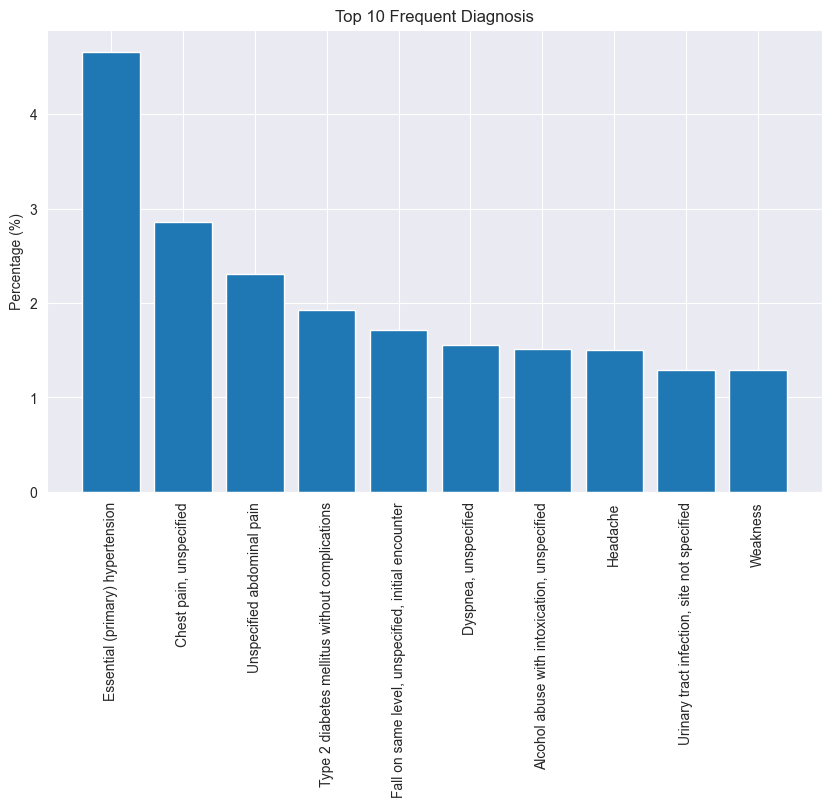

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(top_50_diagnosis.icd_title[:10], top_50_diagnosis.pct[:10])
plt.title("Top 10 Frequent Diagnosis")
plt.xticks(rotation = 90)
plt.ylabel("Percentage (%)")
plt.show()

Lets see if ICD version is dependant on time of admission

In [110]:
# merge diagnosis with admissions
admission_diagnosis = admissions.merge(diagnosis, on = 'subject_id', how = 'inner')

admission_diagnosis.head()


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hospital_expire_flag,admission_los_hours,race_grouped,is_dead,transfer_to_ed,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,18.866667,White/European Descent,False,True,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,18.866667,White/European Descent,False,True,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,18.866667,White/European Descent,False,True,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,18.866667,White/European Descent,False,True,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,...,0,18.866667,White/European Descent,False,True,33258284,2,78959,9,OTHER ASCITES


#### Merging information with disease categories table

In [111]:
disease_categories_df = pd.read_csv("../Data/disease_categories.csv", usecols = lambda column: column != "Unnamed: 0")
disease_categories_df['letter_code'] = disease_categories_df['block_code'].str[0]

# print the shape
print(disease_categories_df.shape)
disease_categories_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../Data/disease_categories.csv'

In [ ]:
disease_categories_df.category.nunique()
disease_categories_df.category.value_counts()

In [ ]:
diagnosis_icd10.loc[:, 'letter_code'] = diagnosis_icd10['category_code'].str[0]

diagnosis_icd10.head()

In [ ]:
diagnosis_mapped_df = diagnosis_icd10.merge(disease_categories_df, on = 'letter_code', how = 'inner')

diagnosis_mapped_df.head()

In [ ]:
# lets rename the categories to be shorter and concise
category_mapping = {
    'Diseases of the nervous system': 'Nervous System',
    'Mental and behavioural disorders': 'Mental & Behavioral',
    'Diseases of the digestive system': 'Digestive System',
    'Endocrine, nutritional and metabolic diseases': 'Endocrine & Metabolic',
    'Diseases of the circulatory system': 'Circulatory System',
    'Diseases of the respiratory system': 'Respiratory System',
    'Diseases of the genitourinary system': 'Genitourinary System',
    'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism': 'Blood & Immune System',
    'Diseases of the eye and adnexa': 'Eye & Adnexa',
    'Diseases of the ear and mastoid process': 'Ear & Mastoid',
    'Pregnancy, childbirth and the puerperium': 'Pregnancy & Childbirth',
    'Certain infectious and parasitic diseases': 'Infectious & Parasitic'
}

diagnosis_mapped_df.loc[:, 'category'] = diagnosis_mapped_df['category'].map(category_mapping)

diagnosis_mapped_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=diagnosis_mapped_df, y='category', order=diagnosis_mapped_df['category'].value_counts().index)
plt.title('Distribution of Disease Categories Diagnosed in ED from 2008-2019', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Disease Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Format y-axis ticks to show thousands with 'k'
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels([f'{x/1000:.1f}k' for x in current_values])

plt.tight_layout()
plt.savefig('visualizations/disease_categories_countplot.png')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 categories
top_categories = diagnosis_mapped_df['category'].value_counts().nlargest(10)
other = diagnosis_mapped_df['category'].value_counts().sum() - top_categories.sum()
top_categories['Other'] = other

# Calculate percentages
percentages = top_categories / top_categories.sum() * 100

# Create a pie chart
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', 
                                   textprops=dict(color="w"), pctdistance=0.85)

# Enhance the appearance
plt.title('Distribution of Top 10 Disease Categories', fontsize=16)
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Add a legend
plt.legend(wedges, percentages.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.savefig('visualizations/disease_categories_pie_chart.png')
plt.show()

# Merging Tables

Here we will start merging several tables and explore what insights/information we can gain 

## Merging Admissions and Ed Stays

Here we can combine on subject id and compare the length of stay between the general admissions (hospital) and emergency admissioins (ED)

In [ ]:
# merge admissions and edstays

edstays_admissions = ed_stays.merge(admissions, on = 'subject_id', how = 'inner')

edstays_admissions.iloc[:, 3:].head()

In [ ]:
edstays_admissions.groupby("insurance")['length_of_stay'].mean().plot.bar();

In [ ]:
edstays_admissions.groupby("race_x")['length_of_stay_hour'].mean().plot.bar()

In [ ]:
edstays_admissions.groupby("gender")['length_of_stay_hour'].mean().plot.bar();

In [ ]:
edstays_admissions.groupby("marital_status")['length_of_stay_hour'].mean().plot.bar();

In [ ]:
edstays_admissions.groupby('admission_type')['length_of_stay_hour'].mean().plot.bar()

# Model Interpretation

## Building A Classifier for gain insight into actuity

Question: Can we perform feature engineering to merge datasets, create a training and test set and train a classifier to interpret its inner workings (coefficients, weights) and try to understand how to classify actuity better

In [112]:
ed_stays.head(3)

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,ed_los_hours,race_grouped,arrival_hour,departure_hour,month
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,4.216667,White/European Descent,19,23,5
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,5.616667,White/European Descent,15,21,6
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,4.766667,White/European Descent,20,1,8


In [113]:
triage_cleaned.head(3)

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,processed_complaints,topic,topic_label
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension,[hypotension],2,Injury & Alcohol-Related Issues
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention","[abd, pain, abdominal, distention]",3,Abdominal & Chest Pain
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain","[nvd, abd, pain]",3,Abdominal & Chest Pain


In [114]:
triage_edstays = triage_cleaned.merge(ed_stays, on = 'subject_id', how = 'inner')

In [115]:
triage_edstays['acuity'] = triage_edstays['acuity'].fillna(triage_edstays['acuity'].mode()[0])

In [116]:
triage_edstays.isna().sum()

subject_id                    0
stay_id_x                     0
temperature                   0
heartrate                     0
resprate                      0
o2sat                         0
sbp                           0
dbp                           0
pain                      25151
acuity                        0
chiefcomplaint               45
processed_complaints          0
topic                         0
topic_label                   0
hadm_id                 1465403
stay_id_y                     0
intime                        0
outtime                       0
gender                        0
race                          0
arrival_transport             0
disposition                   0
ed_los_hours                  0
race_grouped                  0
arrival_hour                  0
departure_hour                0
month                         0
dtype: int64

In [125]:
X = triage_edstays[['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'topic_label', 'gender', 'race_grouped', 'arrival_transport', 'disposition', 'ed_los_hours', 'month']]
subjects_ids = triage_edstays['subject_id']

y = triage_edstays['acuity']

X.head()

,temperature,heartrate,resprate,o2sat,sbp,dbp,topic_label,gender,race_grouped,arrival_transport,disposition,ed_los_hours,month
0,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,4.216667,5
1,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,5.616667,6
2,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,4.766667,8
3,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,HOME,13.500000,7
4,97.8,87.0,14.0,97.0,71.0,43.0,Injury & Alcohol-Related Issues,F,White/European Descent,AMBULANCE,ADMITTED,8.100000,7


In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763521 entries, 0 to 2763520
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   temperature        float64
 1   heartrate          float64
 2   resprate           float64
 3   o2sat              float64
 4   sbp                float64
 5   dbp                float64
 6   topic_label        object 
 7   gender             object 
 8   race_grouped       object 
 9   arrival_transport  object 
 10  disposition        object 
 11  ed_los_hours       float64
 12  month              int32  
dtypes: float64(7), int32(1), object(5)
memory usage: 263.6+ MB


In [127]:
from sklearn.model_selection import train_test_split

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [128]:
# lets do num processing and cat processing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('standardize', StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# column transform
num_cols = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']
cat_cols = ['topic_label', 'gender', 'race_grouped', 'arrival_transport', 'disposition']

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [136]:
# get the feature names

cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_cols)

feature_names = list(num_cols) + list(cat_feature_names)

feature_names

['temperature',
 'heartrate',
 'resprate',
 'o2sat',
 'sbp',
 'dbp',
 'topic_label_Abdominal & Chest Pain',
 'topic_label_General Pain & Weakness',
 'topic_label_Injury & Alcohol-Related Issues',
 'topic_label_Limb & Head Pain',
 'topic_label_Respiratory & Trauma Symptoms',
 'gender_F',
 'gender_M',
 'race_grouped_Asian',
 'race_grouped_Black/African Descent',
 'race_grouped_Hispanic/Latino',
 'race_grouped_Mixed or Other',
 'race_grouped_Native American/Pacific Islander',
 'race_grouped_White/European Descent',
 'arrival_transport_AMBULANCE',
 'arrival_transport_HELICOPTER',
 'arrival_transport_OTHER',
 'arrival_transport_UNKNOWN',
 'arrival_transport_WALK IN',
 'disposition_ADMITTED',
 'disposition_ELOPED',
 'disposition_EXPIRED',
 'disposition_HOME',
 'disposition_LEFT AGAINST MEDICAL ADVICE',
 'disposition_LEFT WITHOUT BEING SEEN',
 'disposition_OTHER',
 'disposition_TRANSFER']

In [130]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((2210816, 32), (552705, 32))

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=4).fit(X_train_processed, y_train)

train_score = clf.score(X_train_processed, y_train)
test_score = clf.score(X_test_processed, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.6122675971225104
Test Score: 0.6114998055020309


In [132]:
from sklearn.metrics import classification_report

# a classification report
y_preds = clf.predict(X_test_processed)
print(classification_report(y_test, y_preds))

/Users/julienh/Desktop/MADS/Milestone1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/julienh/Desktop/MADS/Milestone1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         1.0       0.77      0.24      0.37     17069
         2.0       0.62      0.04      0.08    170829
         3.0       0.61      0.99      0.76    329272
         4.0       0.00      0.00      0.00     33754
         5.0       0.00      0.00      0.00      1781

    accuracy                           0.61    552705
   macro avg       0.40      0.26      0.24    552705
weighted avg       0.58      0.61      0.49    552705



/Users/julienh/Desktop/MADS/Milestone1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



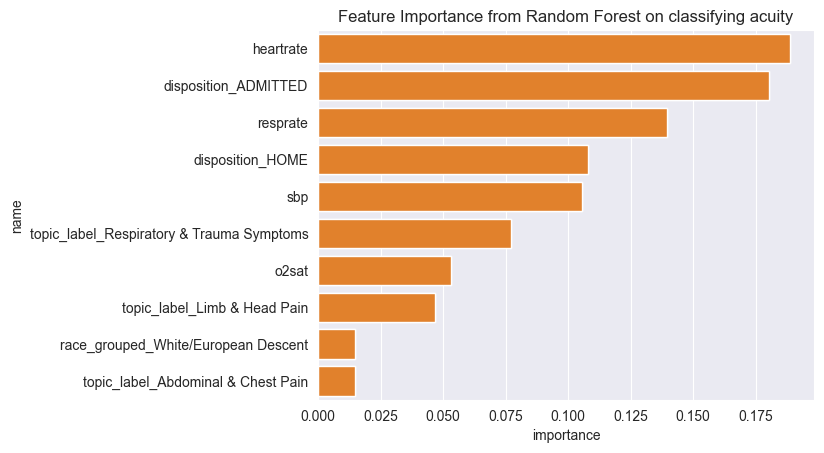

In [138]:

feature_names_importances = list(zip(feature_names, clf.feature_importances_))
sorted_features_by_importance = sorted(feature_names_importances, key = lambda x: x[1], reverse=True)

feature_importance_df = pd.DataFrame({
    'name': [x[0] for x in sorted_features_by_importance],
    'importance': [x[1] for x in sorted_features_by_importance]
})

sns.barplot(x = 'importance', y = 'name', data = feature_importance_df.iloc[:10])
plt.title("Feature Importance from Random Forest on classifying acuity")
plt.savefig('../visualizations/feature-importance-random-forest.png')
plt.show()